In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [2]:
# Загрузим данные
df = pd.read_csv('resultfsb.csv', sep=';', index_col='index')
df.head()

,Тип,НДС,Кол-во,"Вес, кг","Объем, м","Индекс, кг",Сумма с-ф в Арх,Плательщик,Date
index,,,,,,,,,
0,Авиа,Без НДС,8,158.0,0.35,158.0,11560.0,Шапошников,2013-07-15 00:00:00
1,Авиа,НДС,13,120.0,0.30,120.0,8400.0,Приморско-Куйский с/совет,2013-07-29 00:00:00
2,Авиа,Без НДС,5,85.0,0.30,85.0,6450.0,Шапошников,2013-07-25 00:00:00
3,Авто,НДС,75,300.0,3.40,935.0,24820.0,Нстрой,2013-07-29 00:00:00
4,Авто,Без НДС,1,10.0,0.18,49.0,1300.0,Николай,2013-07-29 00:00:00


In [3]:
# Преобразуем pandas.columns в правильный тип данных
data = df.copy()
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.strftime('%Y/%m')
data['Сумма с-ф в Арх'] = data['Сумма с-ф в Арх'].astype(int)
data

,Тип,НДС,Кол-во,"Вес, кг","Объем, м","Индекс, кг",Сумма с-ф в Арх,Плательщик,Date
index,,,,,,,,,
0,Авиа,Без НДС,8,158.0,0.350,158.0,11560,Шапошников,2013/07
1,Авиа,НДС,13,120.0,0.300,120.0,8400,Приморско-Куйский с/совет,2013/07
2,Авиа,Без НДС,5,85.0,0.300,85.0,6450,Шапошников,2013/07
3,Авто,НДС,75,300.0,3.400,935.0,24820,Нстрой,2013/07
4,Авто,Без НДС,1,10.0,0.180,49.0,1300,Николай,2013/07
...,...,...,...,...,...,...,...,...,...
6934,Авто,С НДС,4.0,29.0,0.171,29.0,1550,АБС,2020/12
6935,Авто,С НДС,1.0,3.0,0.010,3.0,1200,КТС,2020/12
6936,Авто,С НДС,1.0,3.0,0.010,3.0,1200,КТС,2020/12


In [4]:
data.describe()

,"Вес, кг","Объем, м","Индекс, кг",Сумма с-ф в Арх
count,6939.000000,6939.000000,6939.000000,6939.000000
mean,89.899568,0.466879,120.509268,5863.209540
std,265.673644,1.556611,441.907343,17826.215816
min,0.100000,0.007000,0.000000,0.000000
25%,9.000000,0.060000,15.000000,1270.000000
50%,28.000000,0.143000,36.000000,2200.000000
75%,80.000000,0.400000,100.500000,4800.000000
max,6975.000000,65.000000,19000.000000,802000.000000


# 1. Расчет годового оборота в разрезе каждого месяца с 2013 по 2020 год.

In [5]:
# Доход за 2013 год
data_2013 = data[(data['Date'] >= '2013/01') & (data['Date'] <= '2013/12')]
data_2013_grouped = pd.DataFrame(data_2013.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2013_grouped

,Сумма с-ф в Арх
Date,
2013/07,58525
2013/08,178466
2013/09,299787
2013/10,460907
2013/11,2490402
2013/12,1674132


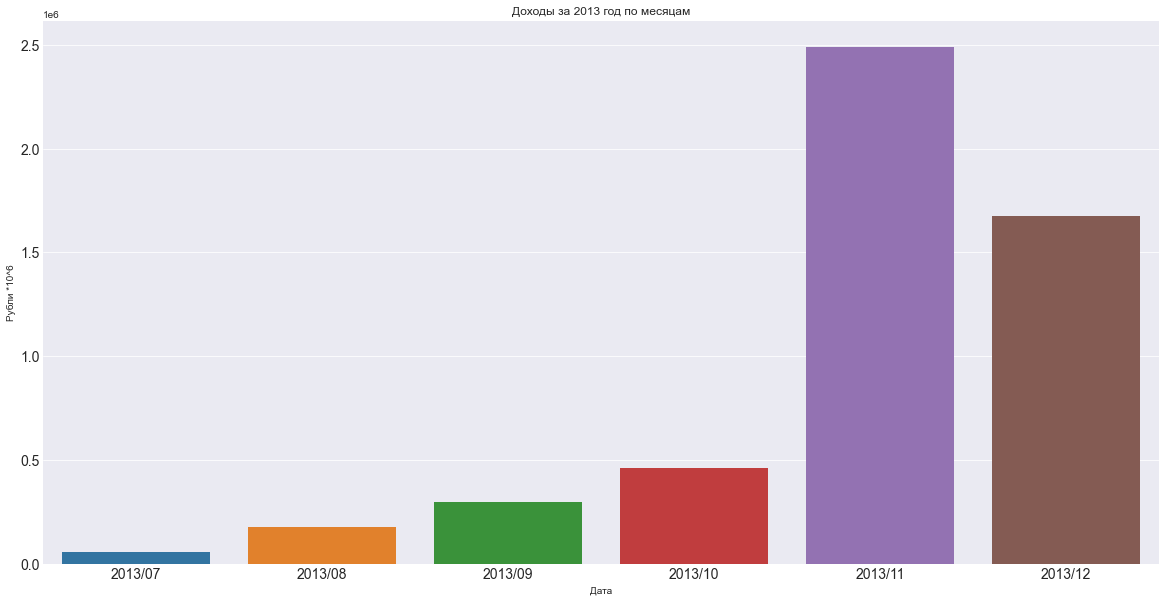

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2013_grouped.index, y=data_2013_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2013 год по месяцам')
plt.tick_params(labelsize=14)
plt.setp(ax, xlabel='Дата', ylabel='Рубли *10^6')
plt.show()

In [7]:
# Доход за 2014 год
data_2014 = data[(data['Date'] >= '2014/01') & (data['Date'] <= '2014/12')]
data_2014_grouped = pd.DataFrame(data_2014.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2014_grouped

,Сумма с-ф в Арх
Date,
2014/01,361163
2014/02,696649
2014/03,510662
2014/04,326612
2014/05,305415
2014/06,556544
2014/07,540743
2014/08,324207
2014/09,516374


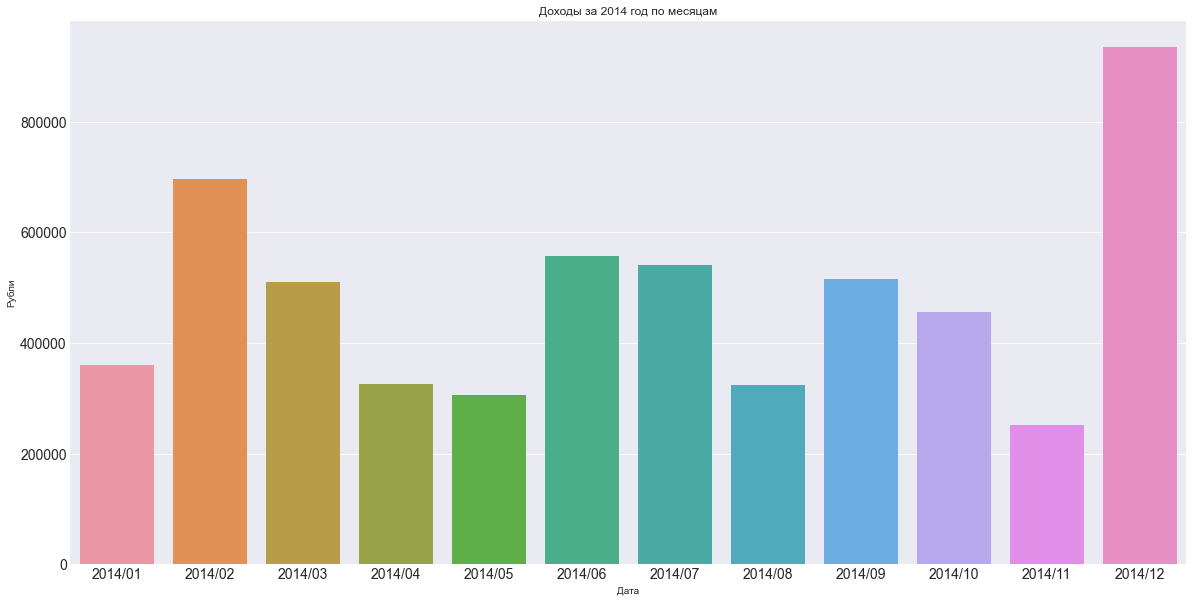

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2014_grouped.index, y=data_2014_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2014 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

In [9]:
# Доход за 2015 год
data_2015 = data[(data['Date'] >= '2015/01') & (data['Date'] <= '2015/12')]
data_2015_grouped = pd.DataFrame(data_2015.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2015_grouped

,Сумма с-ф в Арх
Date,
2015/01,323140
2015/02,354221
2015/03,271650
2015/04,382575
2015/05,135400
2015/06,443800
2015/07,110226
2015/08,217611
2015/09,214495


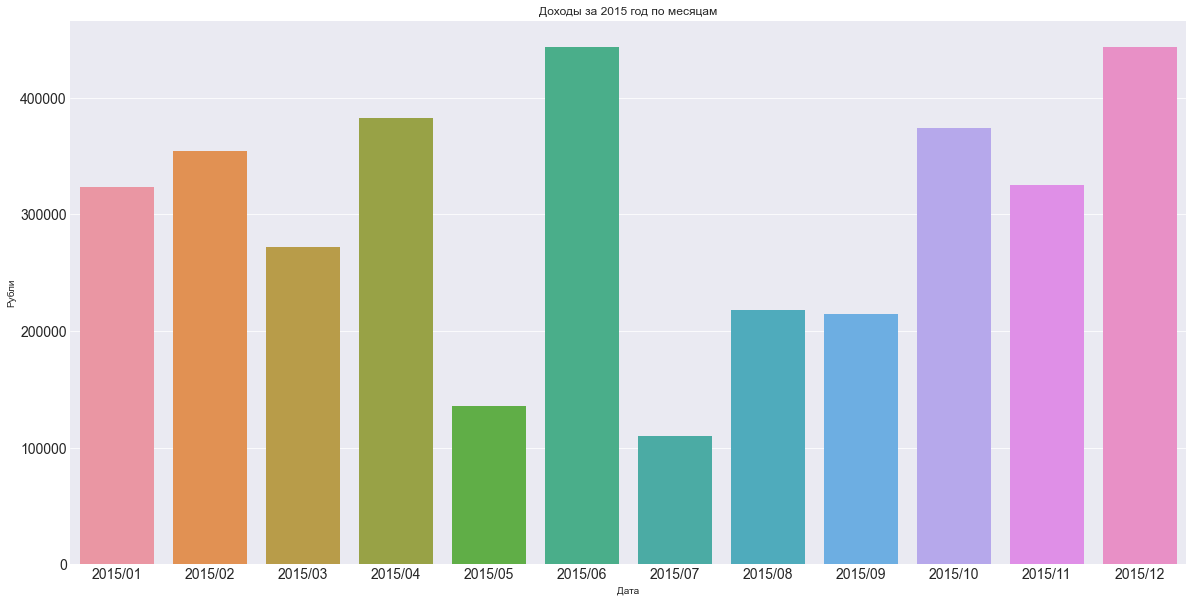

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2015_grouped.index, y=data_2015_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2015 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

In [11]:
# Доход за 2016 год
data_2016 = data[(data['Date'] >= '2016/01') & (data['Date'] <= '2016/12')]
data_2016_grouped = pd.DataFrame(data_2016.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2016_grouped

,Сумма с-ф в Арх
Date,
2016/01,263750
2016/02,400375
2016/03,261068
2016/04,210300
2016/05,261120
2016/06,132200
2016/07,172200
2016/08,283126
2016/09,316040


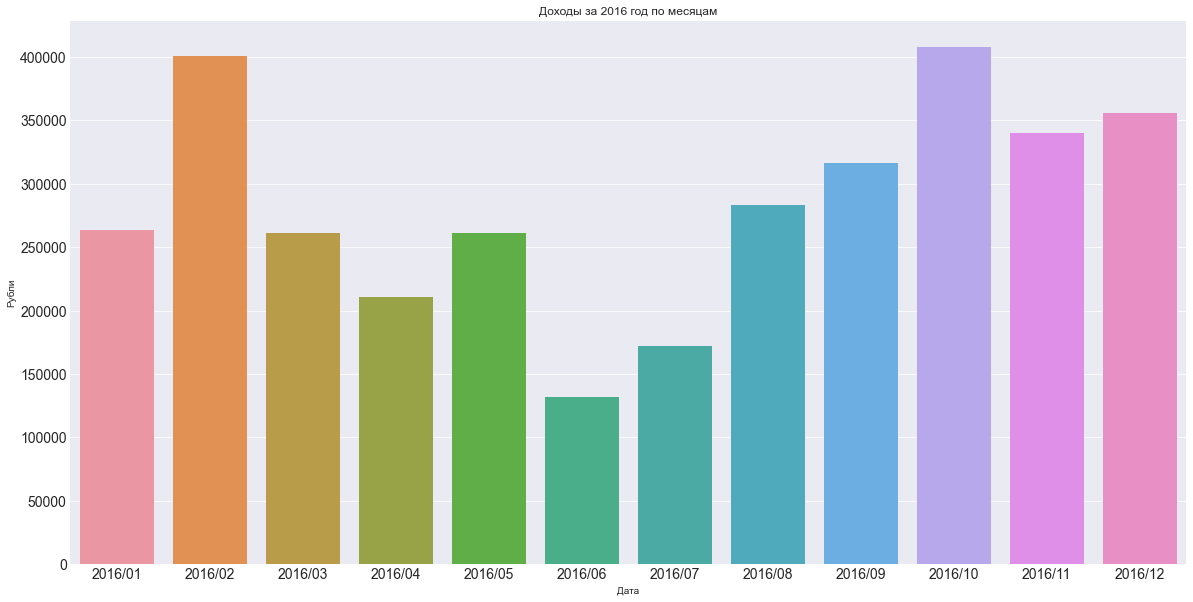

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2016_grouped.index, y=data_2016_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2016 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

In [13]:
# Доход за 2017 год
data_2017 = data[(data['Date'] >= '2017/01') & (data['Date'] <= '2017/12')]
data_2017_grouped = pd.DataFrame(data_2017.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2017_grouped

,Сумма с-ф в Арх
Date,
2017/01,57950
2017/02,233595
2017/03,332040
2017/04,312743
2017/05,349220
2017/06,449505
2017/07,285373
2017/08,364825
2017/09,372150


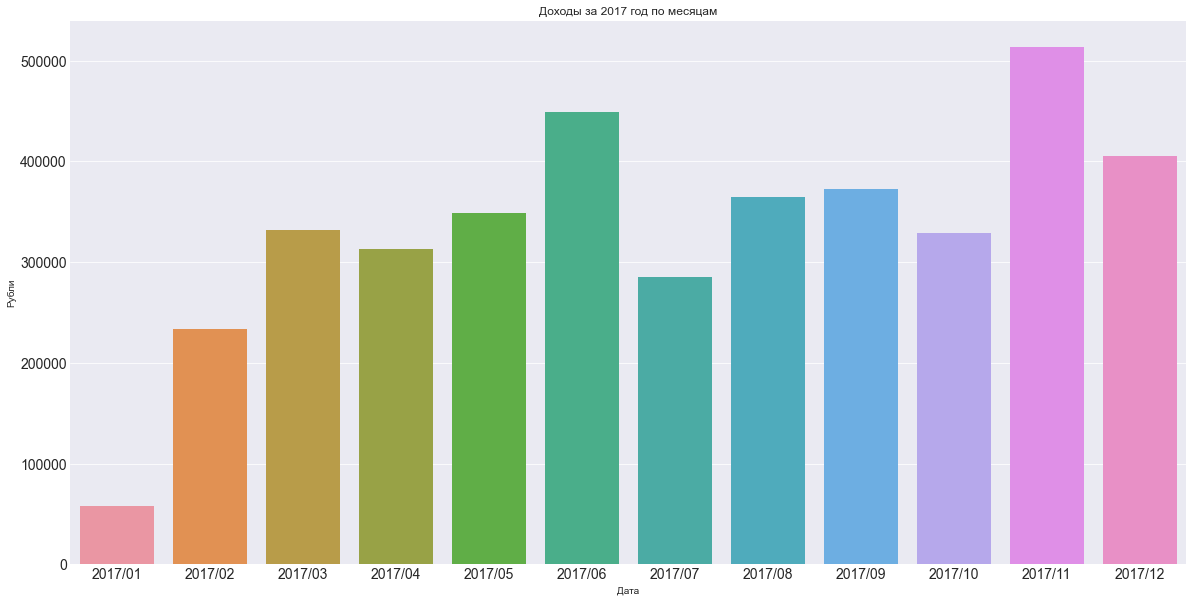

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2017_grouped.index, y=data_2017_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2017 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

In [15]:
# Доход за 2018 год
data_2018 = data[(data['Date'] >= '2018/01') & (data['Date'] <= '2018/12')]
data_2018_grouped = pd.DataFrame(data_2018.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2018_grouped

,Сумма с-ф в Арх
Date,
2018/01,171261
2018/02,180250
2018/03,418930
2018/04,300298
2018/05,150955
2018/06,487081
2018/07,290234
2018/08,724597
2018/09,421780


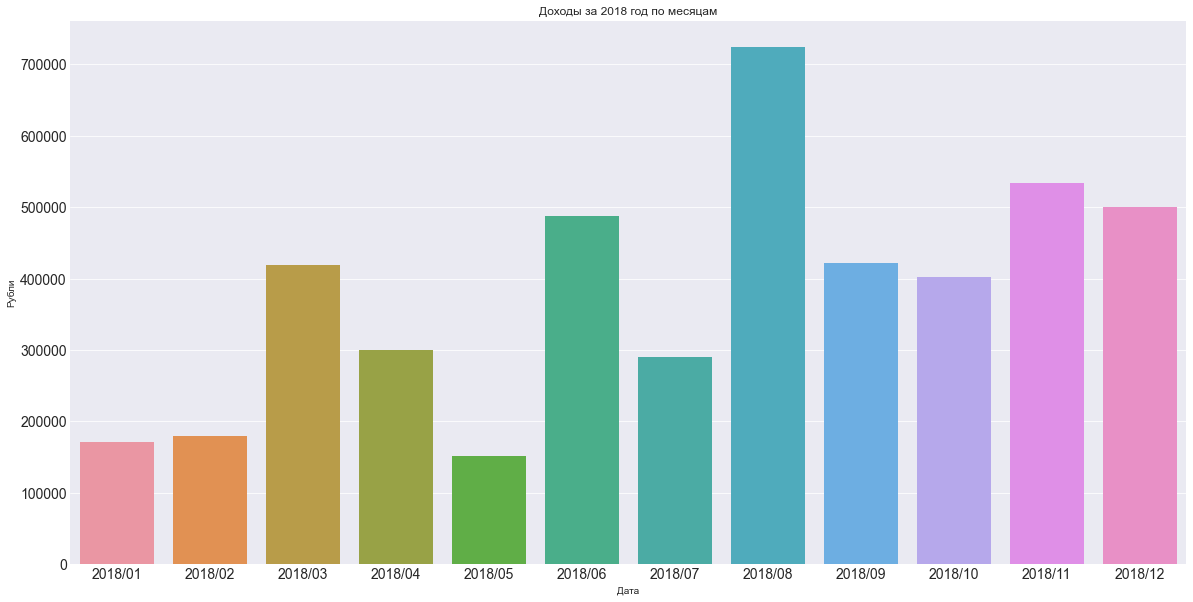

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2018_grouped.index, y=data_2018_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2018 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

In [17]:
# Доход за 2019 год
data_2019 = data[(data['Date'] >= '2019/01') & (data['Date'] <= '2019/12')]
data_2019_grouped = pd.DataFrame(data_2019.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2019_grouped

,Сумма с-ф в Арх
Date,
2019/01,313052
2019/02,477215
2019/03,389618
2019/04,407402
2019/05,229472
2019/06,654043
2019/07,214330
2019/08,654919
2019/09,722161


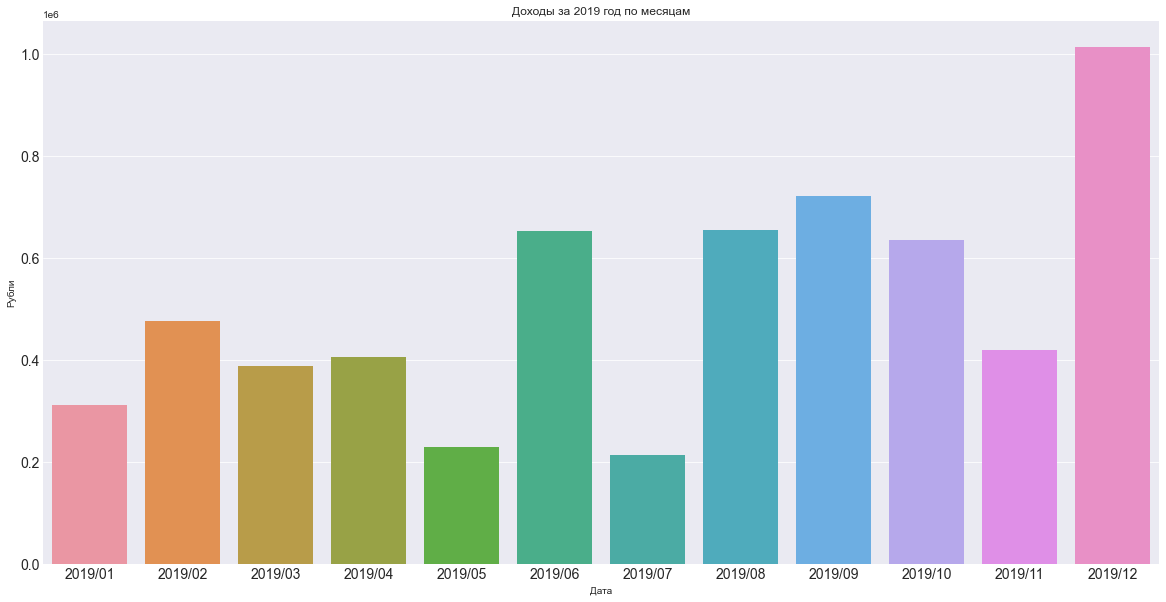

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2019_grouped.index, y=data_2019_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2019 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

In [19]:
# Доход за 2020 год
data_2020 = data[(data['Date'] >= '2020/01') & (data['Date'] <= '2020/12')]
data_2020_grouped = pd.DataFrame(data_2020.groupby(['Date'])['Сумма с-ф в Арх'].agg('sum'))
data_2020_grouped

,Сумма с-ф в Арх
Date,
2020/01,388230
2020/02,530006
2020/03,456144
2020/04,373062
2020/05,456126
2020/06,496619
2020/07,998662
2020/08,886110
2020/09,929421


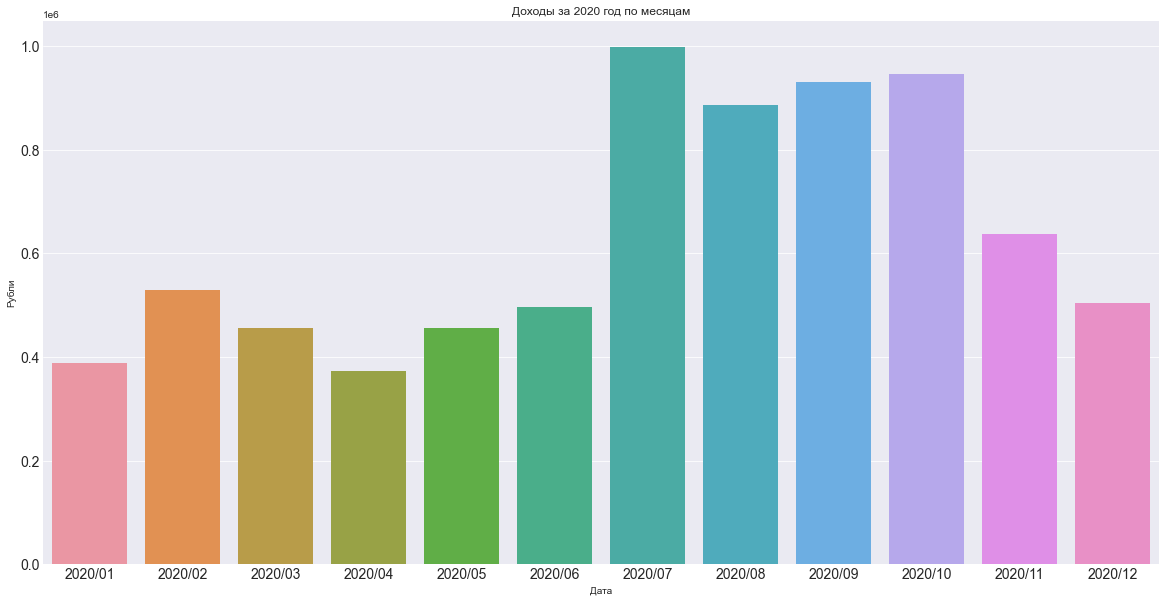

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data_2020_grouped.index, y=data_2020_grouped['Сумма с-ф в Арх'])
    
# Задаем название графика
ax.set_title('Доходы за 2020 год по месяцам')

plt.tick_params(labelsize=14)

# Задаем название оси x и оси y
plt.setp(ax, xlabel='Дата', ylabel='Рубли')
plt.show()

Исходя из этого можно сказать, что данный вид деятельности обладает некой сезонностью. Это связано с тем, что осенью, перед самым началом зимы, большинство клиентов хотят успеть в срок доставить свои грузы до того как наступят холода. 


# 2. Какой тип грузоперевозки преобладает?


In [21]:
type_shipping_df = data.copy()
type_shipping = type_shipping_df.groupby(['Тип']).agg({'Плательщик': 'nunique'})
type_shipping

,Плательщик
Тип,
Авиа,327
Авто,306
Море,24


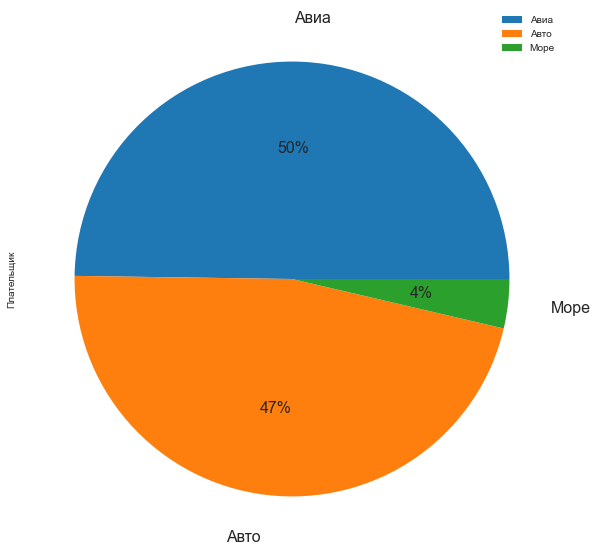

In [22]:
type_shipping.plot.pie(figsize=(10,10), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

Вывод:
1) Авиа перевозки (с небольшим отрывом)
2) Авто перевозки
3) Море

## 2.1 Какой тип перевозок преобладает, сколько денег, какое количество груза перевозится в разрезе сезонов?
       

In [23]:
type_shipping_df['Date'] = pd.to_datetime(type_shipping_df['Date'], errors='coerce')
type_shipping_df['season'] = (type_shipping_df['Date'].dt.month%12+3)//3
seasons = {
    1: 'Winter',
    2: 'Spring', 
    3: 'Summer', 
    4: 'Fall'
}
type_shipping_df['season_name'] = type_shipping_df['season'].map(seasons)
type_shipping_df

,Тип,НДС,Кол-во,"Вес, кг","Объем, м","Индекс, кг",Сумма с-ф в Арх,Плательщик,Date,season,season_name
index,,,,,,,,,,,
0,Авиа,Без НДС,8,158.0,0.350,158.0,11560,Шапошников,2013-07-01,3.0,Summer
1,Авиа,НДС,13,120.0,0.300,120.0,8400,Приморско-Куйский с/совет,2013-07-01,3.0,Summer
2,Авиа,Без НДС,5,85.0,0.300,85.0,6450,Шапошников,2013-07-01,3.0,Summer
3,Авто,НДС,75,300.0,3.400,935.0,24820,Нстрой,2013-07-01,3.0,Summer
4,Авто,Без НДС,1,10.0,0.180,49.0,1300,Николай,2013-07-01,3.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...
6934,Авто,С НДС,4.0,29.0,0.171,29.0,1550,АБС,2020-12-01,1.0,Winter
6935,Авто,С НДС,1.0,3.0,0.010,3.0,1200,КТС,2020-12-01,1.0,Winter
6936,Авто,С НДС,1.0,3.0,0.010,3.0,1200,КТС,2020-12-01,1.0,Winter


In [24]:
type_shipping_by_season = type_shipping_df.groupby(['season_name', 'Тип']).agg({'Плательщик':'count'})
type_shipping_by_season

Плательщик
season_name Тип             
Fall        Авиа        1197
            Авто         800
            Море          28
Spring      Авиа         914
            Авто         536
Summer      Авиа         840
            Авто         858
            Море          14
Winter      Авиа        1162
            Авто         560

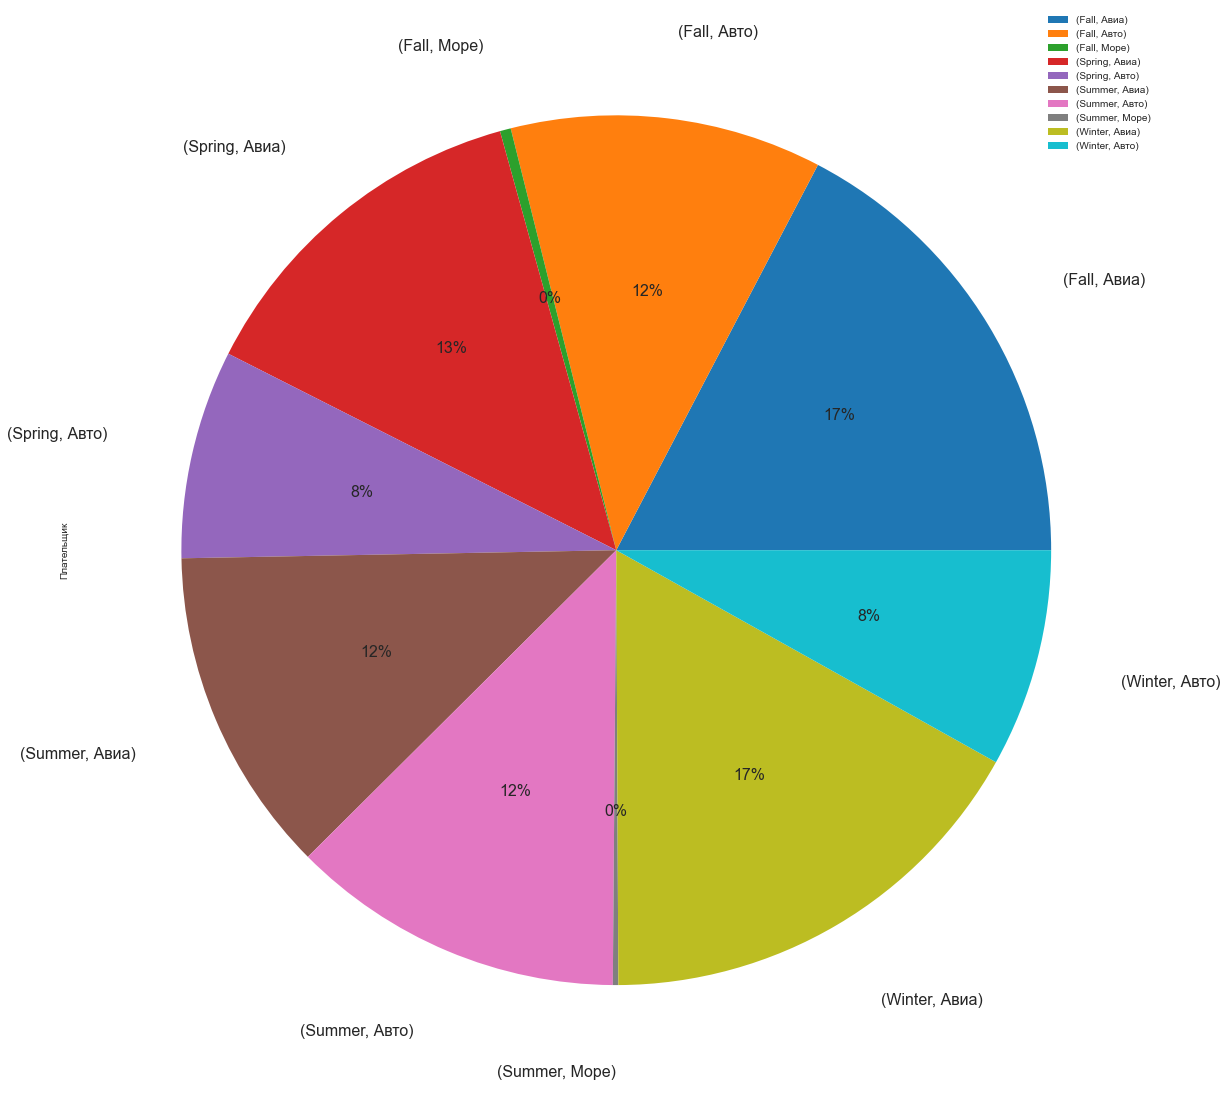

In [25]:
type_shipping_by_season.plot.pie(figsize=(20, 20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

Исходя из полученных результатов, видно, что во всех сезонах преобладают авиа перевозки, за исключением лета. Перевозки по морю осуществляются только летом и осенью.

## 2.2 В каких заявках больше всего денег и на сколько больше веса перевезено? (За все время)

In [26]:
type_shipping_money = type_shipping_df.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,22226897,346720.30
Авто,16821769,428081.51
Море,1636145,61412.00


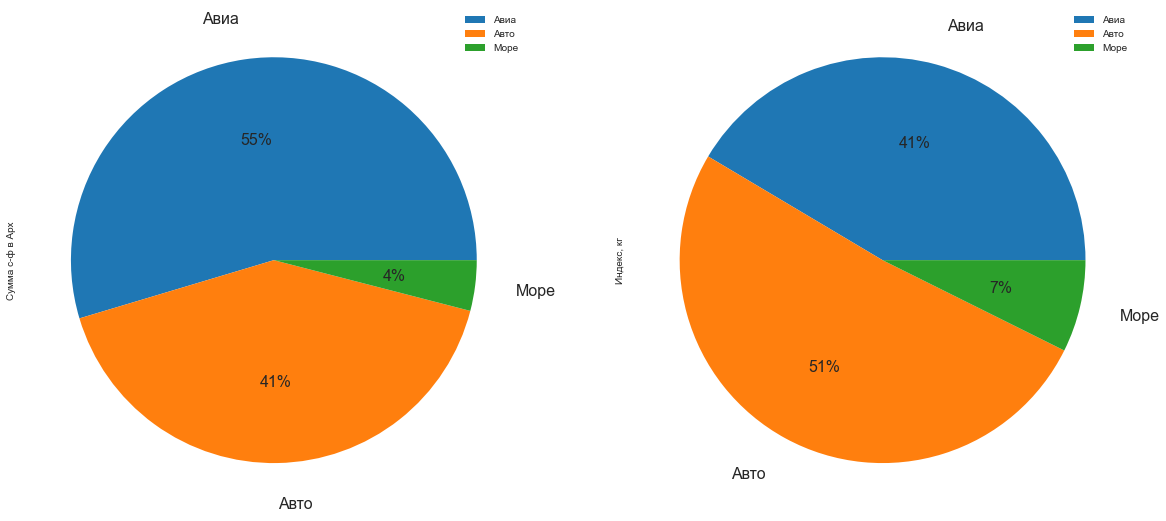

In [27]:
type_shipping_money.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

## 2.2.1 В каких заявках больше денег и на сколько больше веса перевезено в разрезе каждого года?

### 2013 год:

In [28]:
type_shipping_money_2013 = data_2013.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2013

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,4302673,46032.0
Авто,547270,13481.0
Море,312276,8873.0


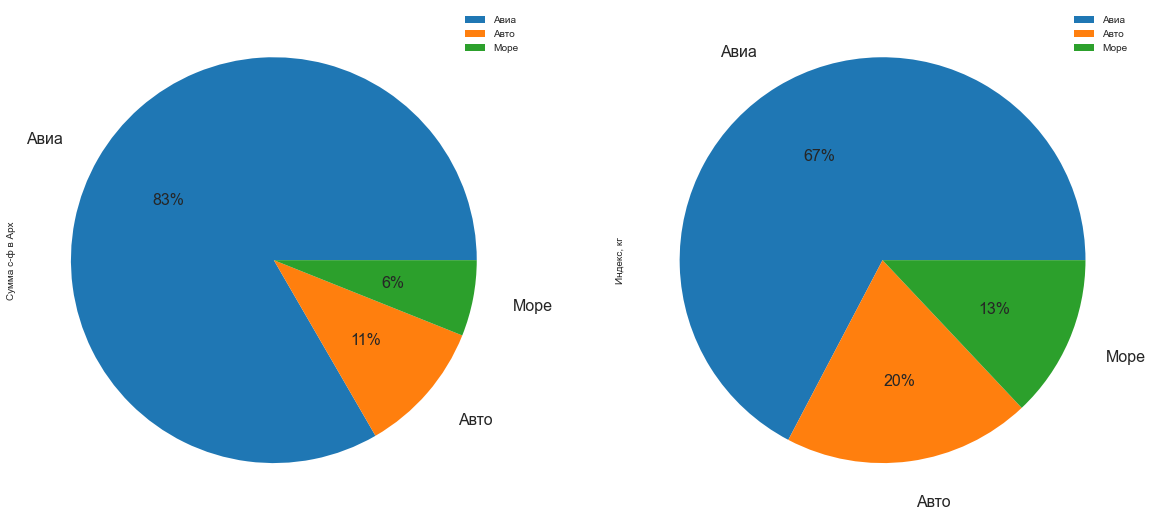

In [29]:
type_shipping_money_2013.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2014 год:

In [30]:
type_shipping_money_2014 = data_2014.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2014

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,3197127,75330.0
Авто,2185581,59687.0
Море,400769,10360.0


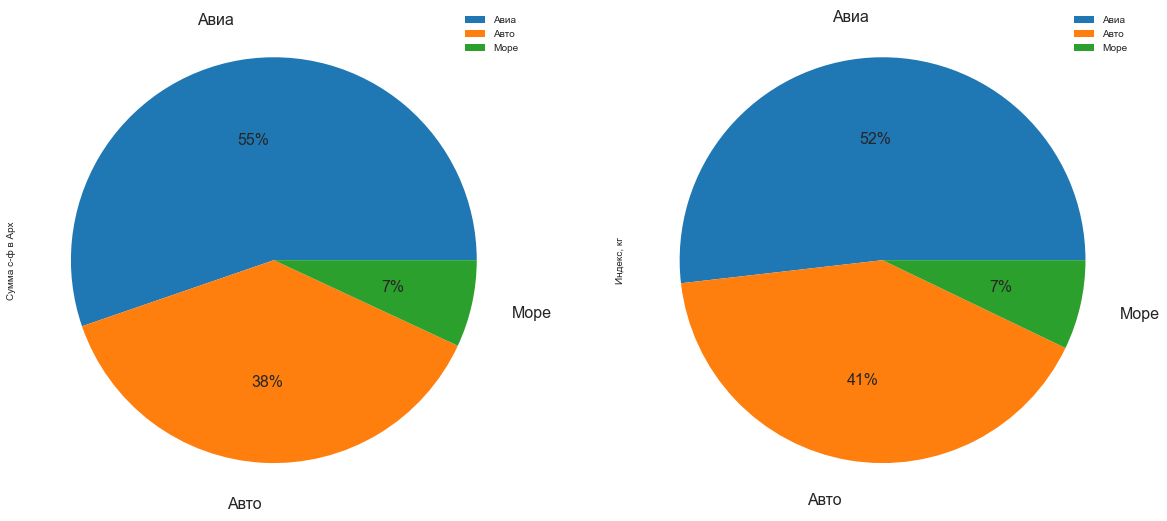

In [31]:
type_shipping_money_2014.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2015 год:

In [32]:
type_shipping_money_2015 = data_2015.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2015

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,3358148,68381.1
Авто,190950,5694.0
Море,46500,1683.0


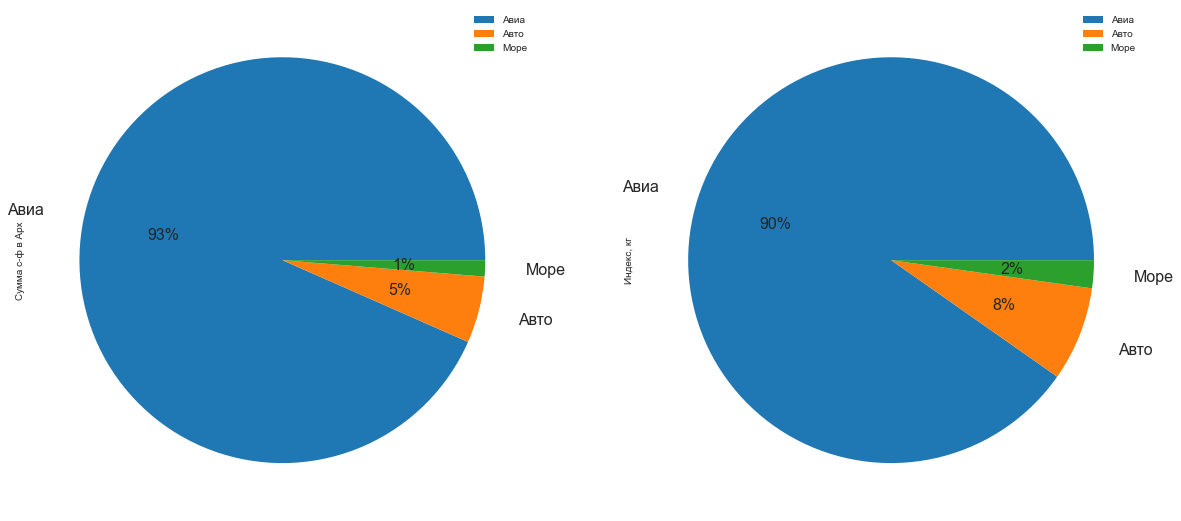

In [33]:
type_shipping_money_2015.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2016 год:

In [34]:
type_shipping_money_2016 = data_2016.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2016

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,1780336,33786.0
Авто,1524598,45507.0
Море,98800,1461.0


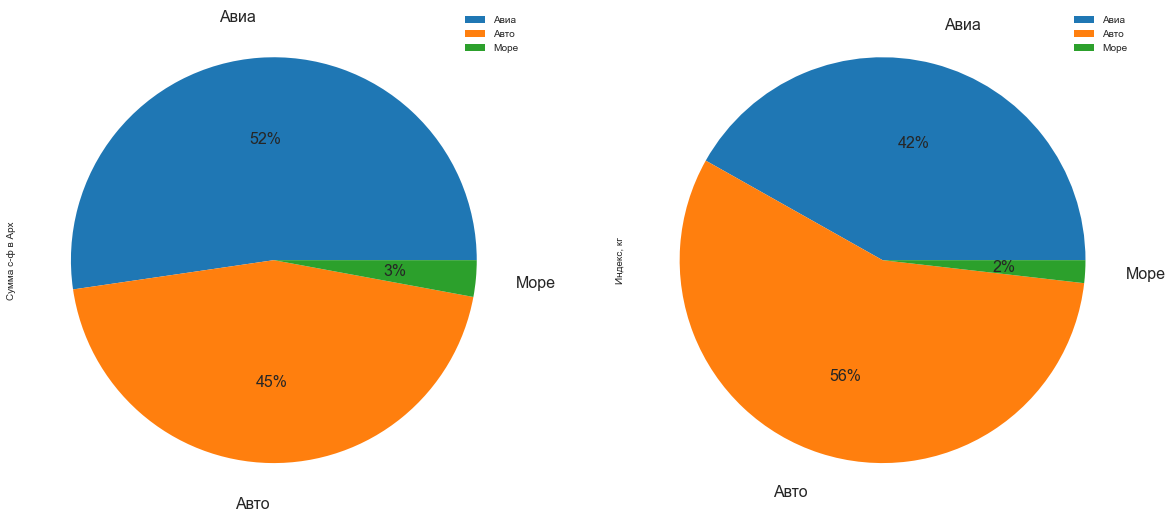

In [35]:
type_shipping_money_2016.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2017 год:

In [36]:
type_shipping_money_2017 = data_2017.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2017

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,2915107,52495.2
Авто,1045560,26112.0
Море,45800,765.0


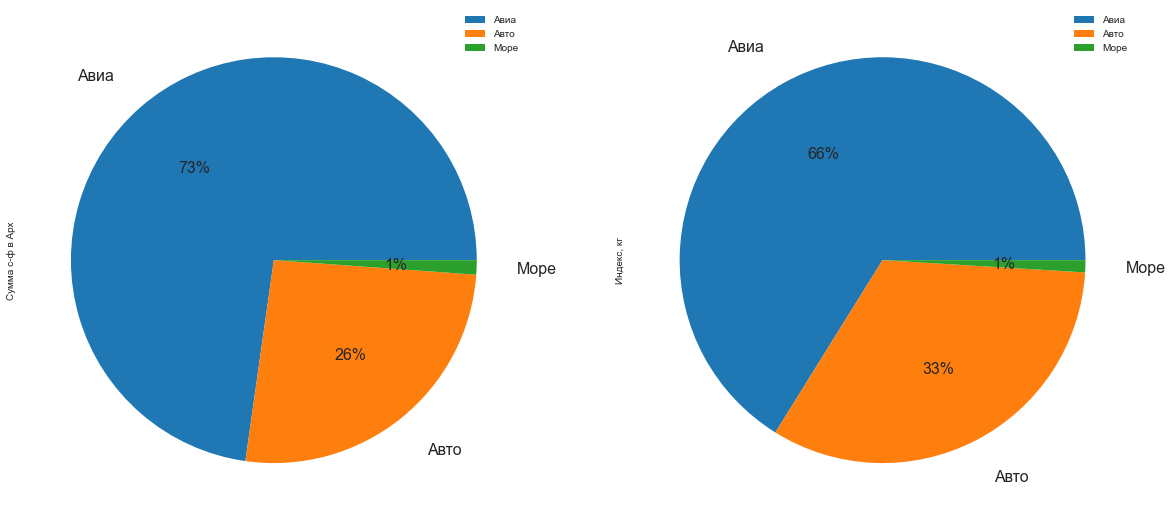

In [37]:
type_shipping_money_2017.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2018 год:

In [38]:
type_shipping_money_2018 = data_2018.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2018

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,2845109,37897.0
Авто,1715085,52690.0
Море,20000,270.0


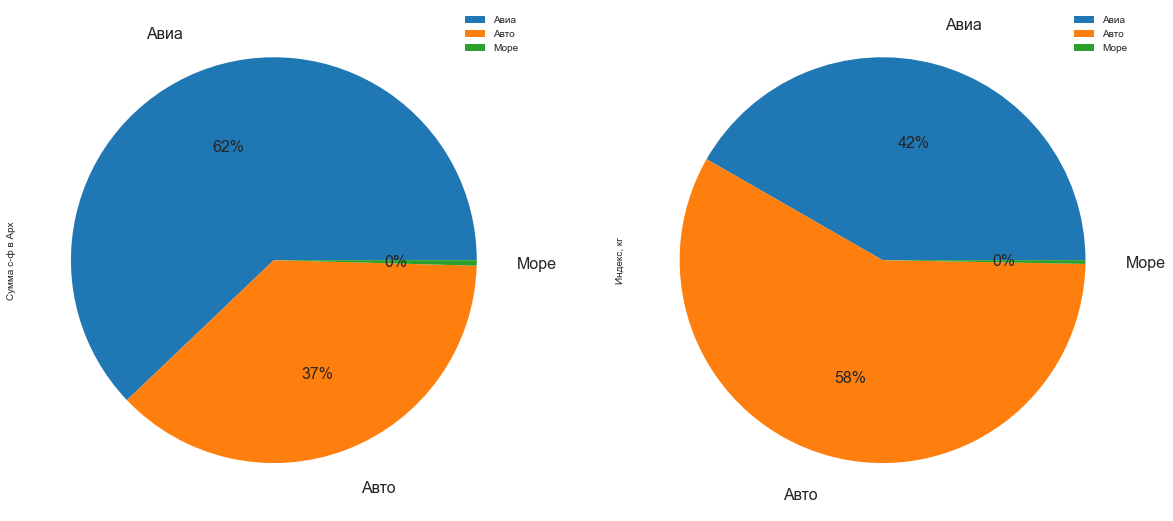

In [39]:
type_shipping_money_2018.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2019 год:

In [40]:
type_shipping_money_2019 = data_2019.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2019

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,2637191,25071.0
Авто,3494941,84717.0


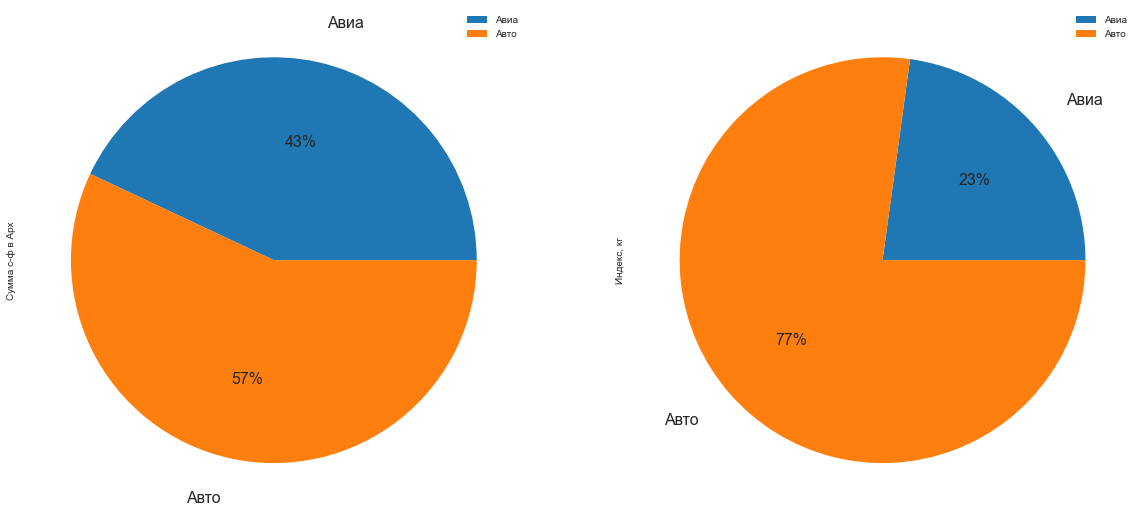

In [41]:
type_shipping_money_2019.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

### 2020 год:

In [42]:
type_shipping_money_2020 = data_2020.groupby(['Тип']).agg({'Сумма с-ф в Арх': 'sum', 'Индекс, кг': 'sum'})
type_shipping_money_2020

,Сумма с-ф в Арх,"Индекс, кг"
Тип,,
Авиа,1060780,6562.00
Авто,5830036,134052.51
Море,712000,38000.00


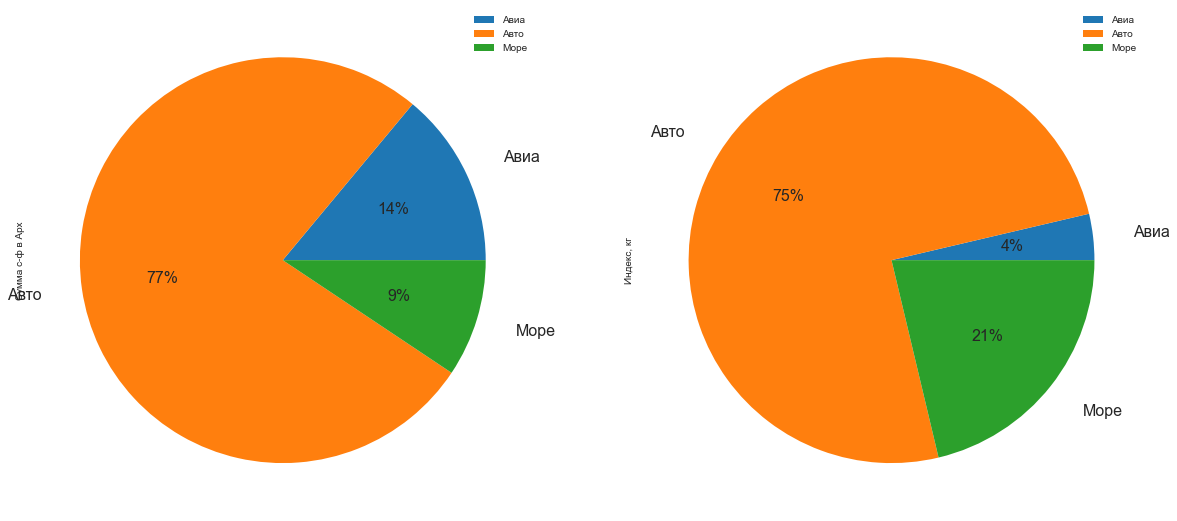

In [43]:
type_shipping_money_2020.plot.pie(figsize=(20,20), subplots=True, fontsize=16, autopct='%1.0f%%', labeldistance=1.2)
plt.show()

# 3. Сколько заявок в каждом из типов клиентов.

In [44]:
data_entity = data[(data['НДС'] == 'НДС') | (data['НДС'] == 'С НДС') | (data['НДС'] == 'НДС ')]
data_entity

,Тип,НДС,Кол-во,"Вес, кг","Объем, м","Индекс, кг",Сумма с-ф в Арх,Плательщик,Date
index,,,,,,,,,
1,Авиа,НДС,13,120.0,0.300,120.0,8400,Приморско-Куйский с/совет,2013/07
3,Авто,НДС,75,300.0,3.400,935.0,24820,Нстрой,2013/07
5,Авиа,НДС,5,40.0,0.150,42.0,2095,ЭСМ,2013/07
6,Авиа,НДС,5,91.0,0.220,91.0,1200,КЭК,2013/08
7,Авиа,НДС,1,3.0,0.010,3.0,1000,КЭК,2013/08
...,...,...,...,...,...,...,...,...,...
6934,Авто,С НДС,4.0,29.0,0.171,29.0,1550,АБС,2020/12
6935,Авто,С НДС,1.0,3.0,0.010,3.0,1200,КТС,2020/12
6936,Авто,С НДС,1.0,3.0,0.010,3.0,1200,КТС,2020/12


In [45]:
data_not_entity = data[data['НДС'] == 'Без НДС']
data_not_entity

,Тип,НДС,Кол-во,"Вес, кг","Объем, м","Индекс, кг",Сумма с-ф в Арх,Плательщик,Date
index,,,,,,,,,
0,Авиа,Без НДС,8,158.0,0.35,158.0,11560,Шапошников,2013/07
2,Авиа,Без НДС,5,85.0,0.30,85.0,6450,Шапошников,2013/07
4,Авто,Без НДС,1,10.0,0.18,49.0,1300,Николай,2013/07
8,Авто,Без НДС,2,30.0,0.64,176.0,6500,Вехлов,2013/08
9,Авиа,Без НДС,1,1.0,0.01,1.0,1220,Промсервис,2013/08
...,...,...,...,...,...,...,...,...,...
6926,Авиа,Без НДС,2.0,19.0,0.11,25.0,3800,Торцев,2020/12
6928,Авиа,Без НДС,1.0,2.0,0.04,10.0,1000,Майти,2020/12
6929,Авиа,Без НДС,3.0,35.0,0.16,35.0,6600,Промсервис,2020/12


## 3.1 Среднее и медианное значение веса, объема и весового индекса по типу клиентов

## 3.1.1 Среднее и медианное значение веса, объема и весового индекса с юридическими лицами

In [46]:
type_mean_entity = data_entity.groupby('Тип').agg({'Вес, кг': 'mean', 'Объем, м': 'mean', 'Индекс, кг': 'mean'})
type_mean_entity

,"Вес, кг","Объем, м","Индекс, кг"
Тип,,,
Авиа,71.608633,0.400575,84.967990
Авто,98.404412,0.522418,123.083127
Море,675.857143,3.758357,3296.357143


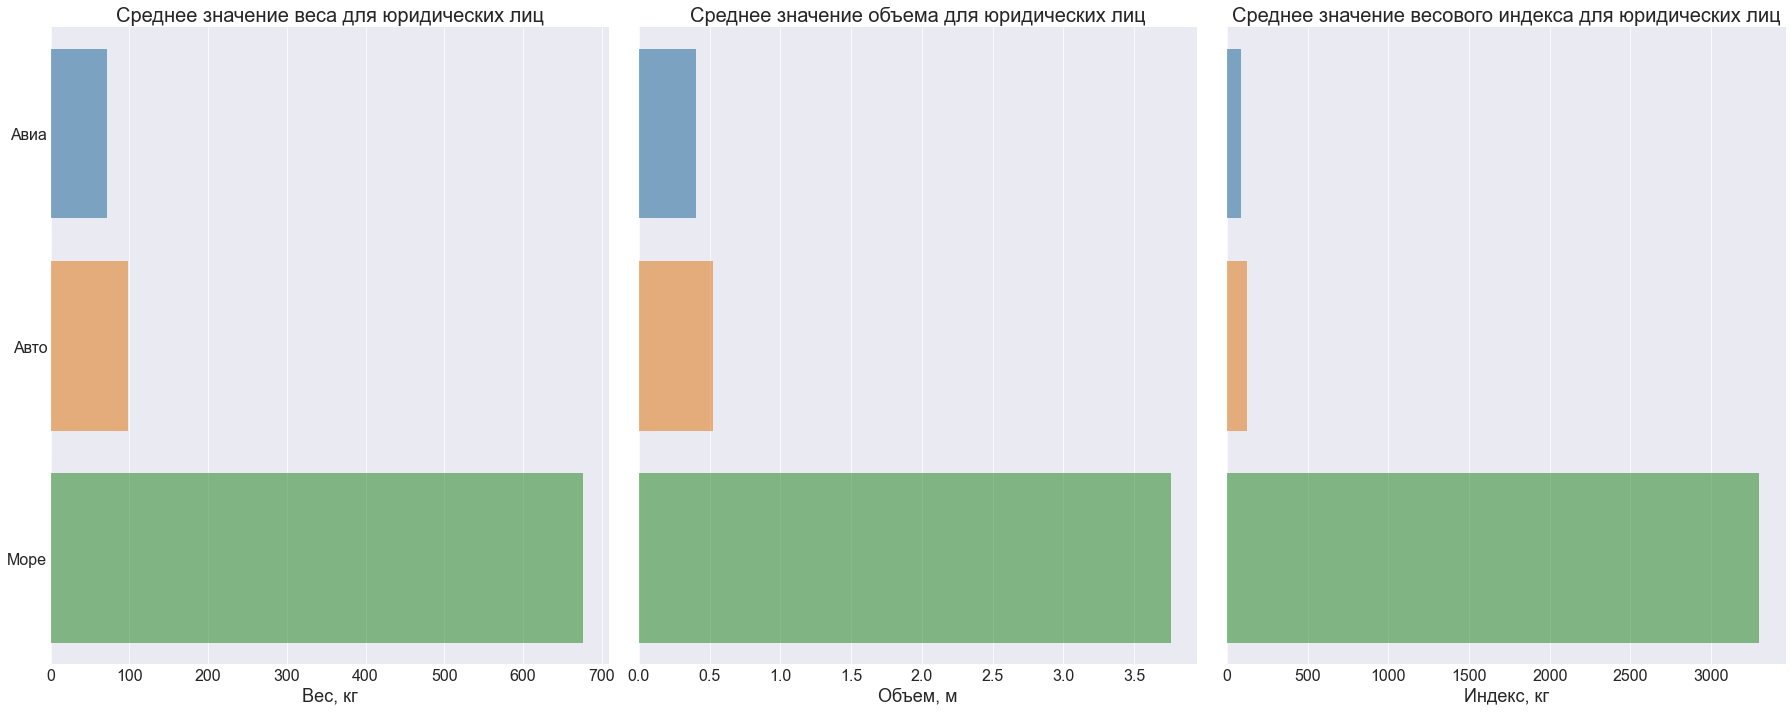

In [47]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y=type_mean_entity.index, x=type_mean_entity['Вес, кг'], data=type_mean_entity, alpha=0.6, ax=ax[0])
ax[0].set_title("Среднее значение веса для юридических лиц", fontsize=20)
ax[0].set_xlabel('Вес, кг', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=type_mean_entity.index, x=type_mean_entity['Объем, м'], data=type_mean_entity, alpha=0.6, ax=ax[1])
ax[1].set_title("Среднее значение объема для юридических лиц", fontsize=20)
ax[1].set_xlabel('Объем, м', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=type_mean_entity.index, x=type_mean_entity['Индекс, кг'], data=type_mean_entity, alpha=0.6, ax=ax[2])
ax[2].set_title("Среднее значение весового индекса для юридических лиц", fontsize=20)
ax[2].set_xlabel('Индекс, кг', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

In [48]:
type_median_entity = data_entity.groupby('Тип').agg({'Вес, кг': 'median', 'Объем, м': 'median', 'Индекс, кг': 'median'})
type_median_entity

,"Вес, кг","Объем, м","Индекс, кг"
Тип,,,
Авиа,23.0,0.1100,27.0
Авто,21.0,0.1055,27.0
Море,143.0,1.0000,286.0


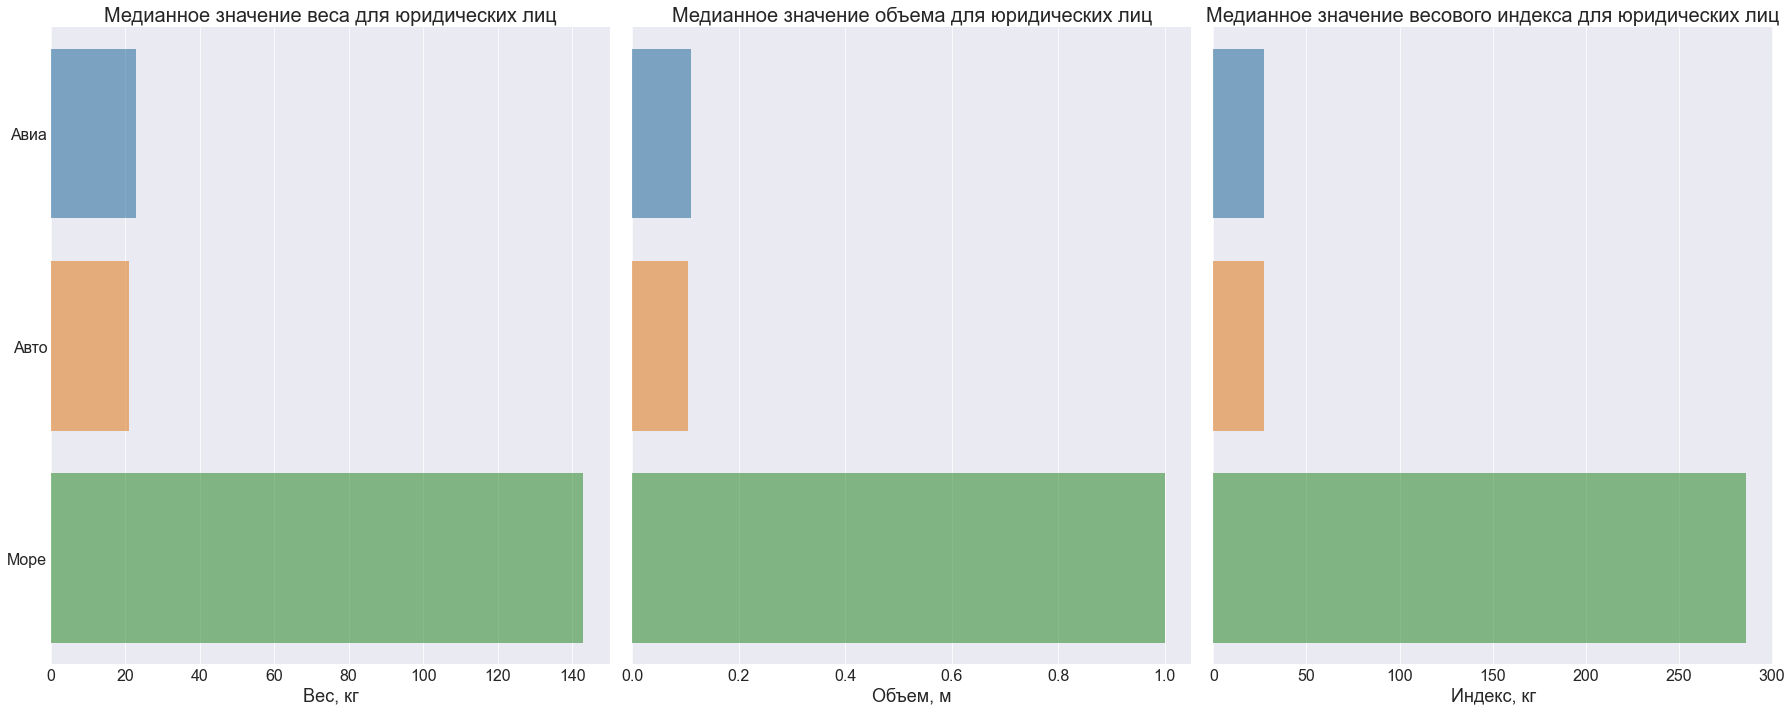

In [49]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y=type_median_entity.index, x=type_median_entity['Вес, кг'], data=type_median_entity, alpha=0.6, ax=ax[0])
ax[0].set_title("Медианное значение веса для юридических лиц", fontsize=20)
ax[0].set_xlabel('Вес, кг', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=type_median_entity.index, x=type_median_entity['Объем, м'], data=type_median_entity, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианное значение объема для юридических лиц", fontsize=20)
ax[1].set_xlabel('Объем, м', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=type_median_entity.index, x=type_median_entity['Индекс, кг'], data=type_median_entity, alpha=0.6, ax=ax[2])
ax[2].set_title("Медианное значение весового индекса для юридических лиц", fontsize=20)
ax[2].set_xlabel('Индекс, кг', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

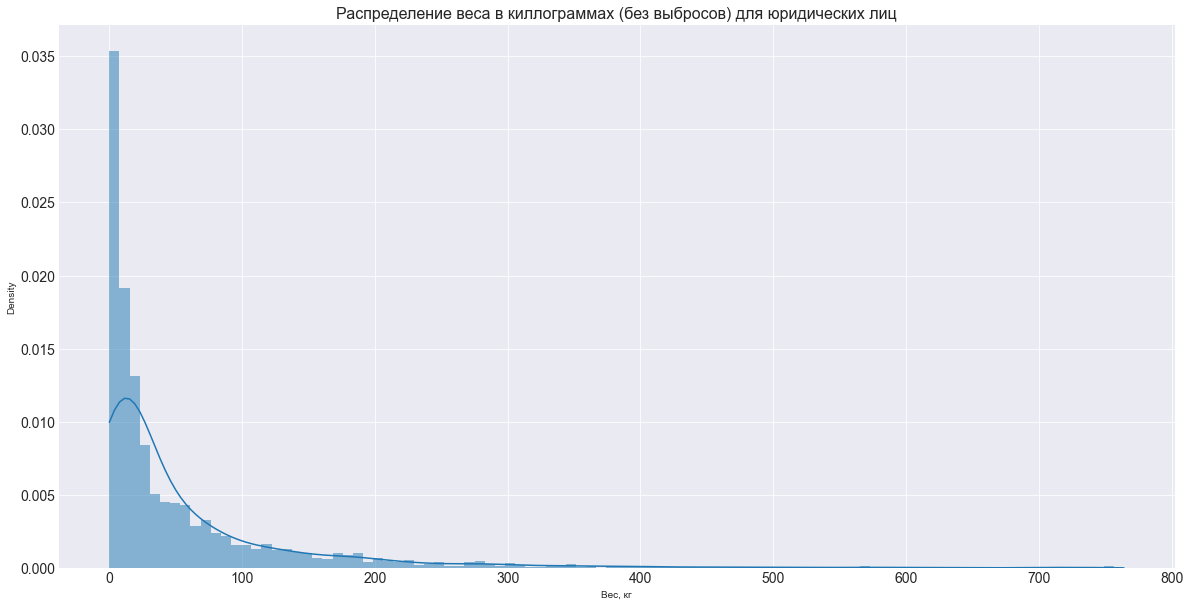

In [50]:
# Наблюдаемое отклонение от среднего
dev = (data_entity['Вес, кг']-data_entity['Вес, кг'].mean()).abs()
# Стандартное отклонение
std = data_entity['Вес, кг'].std()
# Фильтруем исходный набор данных
data_entity_trimmed = data_entity[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение веса в киллограммах (без выбросов) для юридических лиц", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(data_entity_trimmed['Вес, кг'], stat="density", kde=True, linewidth=0)
plt.show()

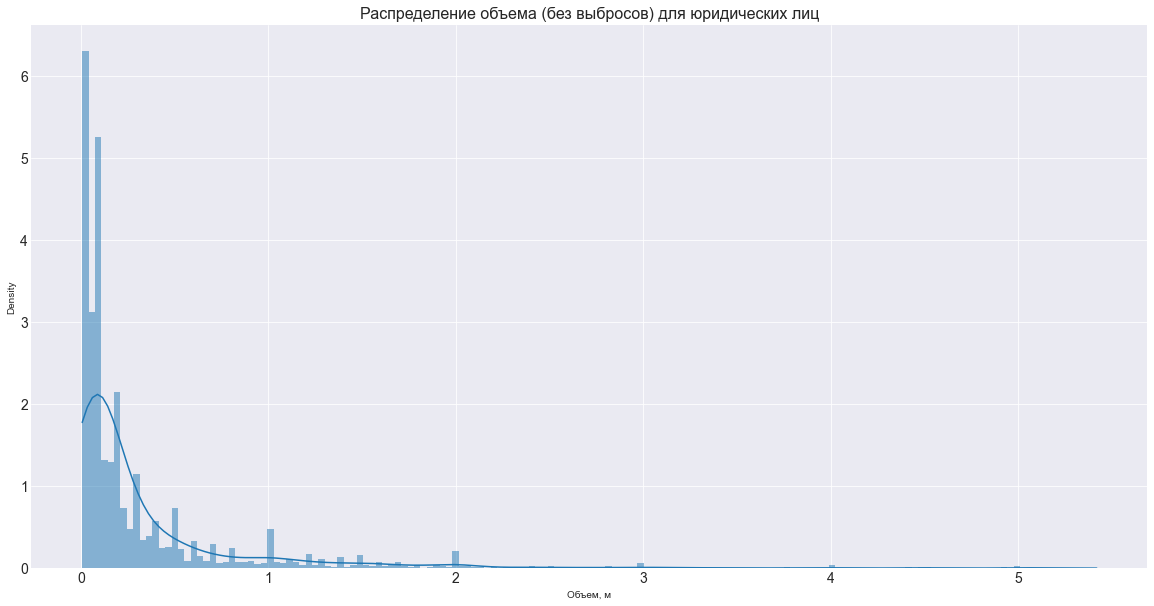

In [51]:
# Наблюдаемое отклонение от среднего
dev = (data_entity['Объем, м']-data_entity['Объем, м'].mean()).abs()
# Стандартное отклонение
std = data_entity['Объем, м'].std()
# Фильтруем исходный набор данных
data_entity_trimmed = data_entity[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение объема (без выбросов) для юридических лиц", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(data_entity_trimmed['Объем, м'], stat="density", kde=True, linewidth=0)
plt.show()

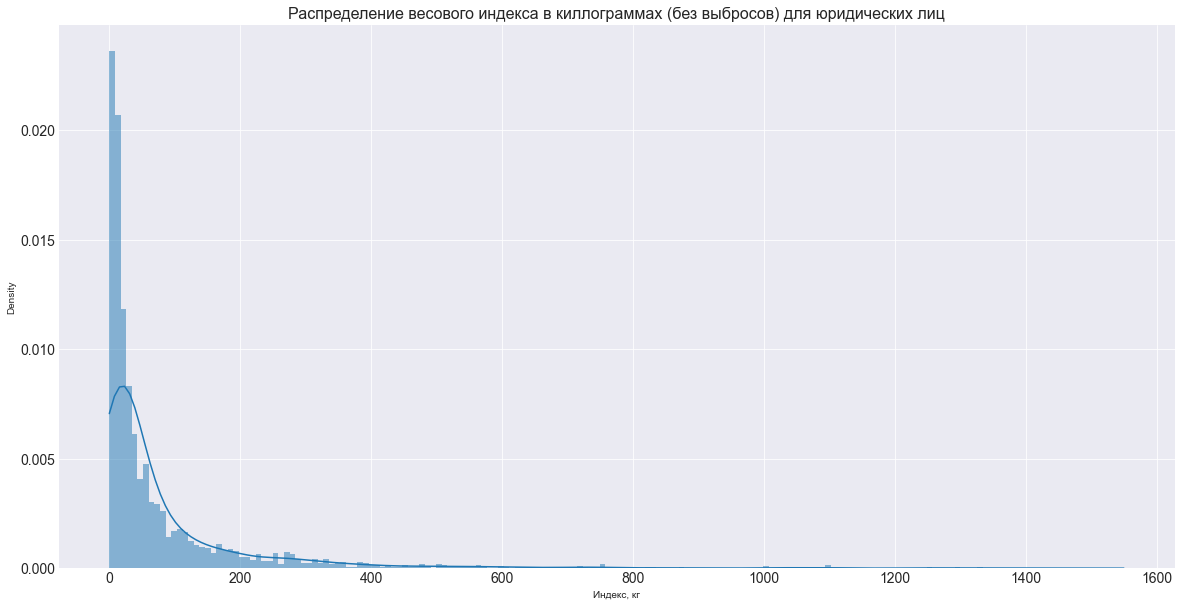

In [52]:
# Наблюдаемое отклонение от среднего
dev = (data_entity['Индекс, кг']-data_entity['Индекс, кг'].mean()).abs()
# Стандартное отклонение
std = data_entity['Индекс, кг'].std()
# Фильтруем исходный набор данных
data_entity_trimmed = data_entity[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение весового индекса в киллограммах (без выбросов) для юридических лиц", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(data_entity_trimmed['Индекс, кг'], stat="density", kde=True, linewidth=0)
plt.show()

## 3.1.2 Среднее и медианное значение веса, объема и весового индекса, а так же их гистограммы распределения для физических лиц

In [53]:
type_mean_not_entity = data_not_entity.groupby('Тип').agg({'Вес, кг': 'mean', 'Объем, м': 'mean', 'Индекс, кг': 'mean'})
type_mean_not_entity

,"Вес, кг","Объем, м","Индекс, кг"
Тип,,,
Авиа,62.589577,0.306694,81.964984
Авто,136.641853,0.648462,194.854839
Море,393.142857,1.761286,545.107143


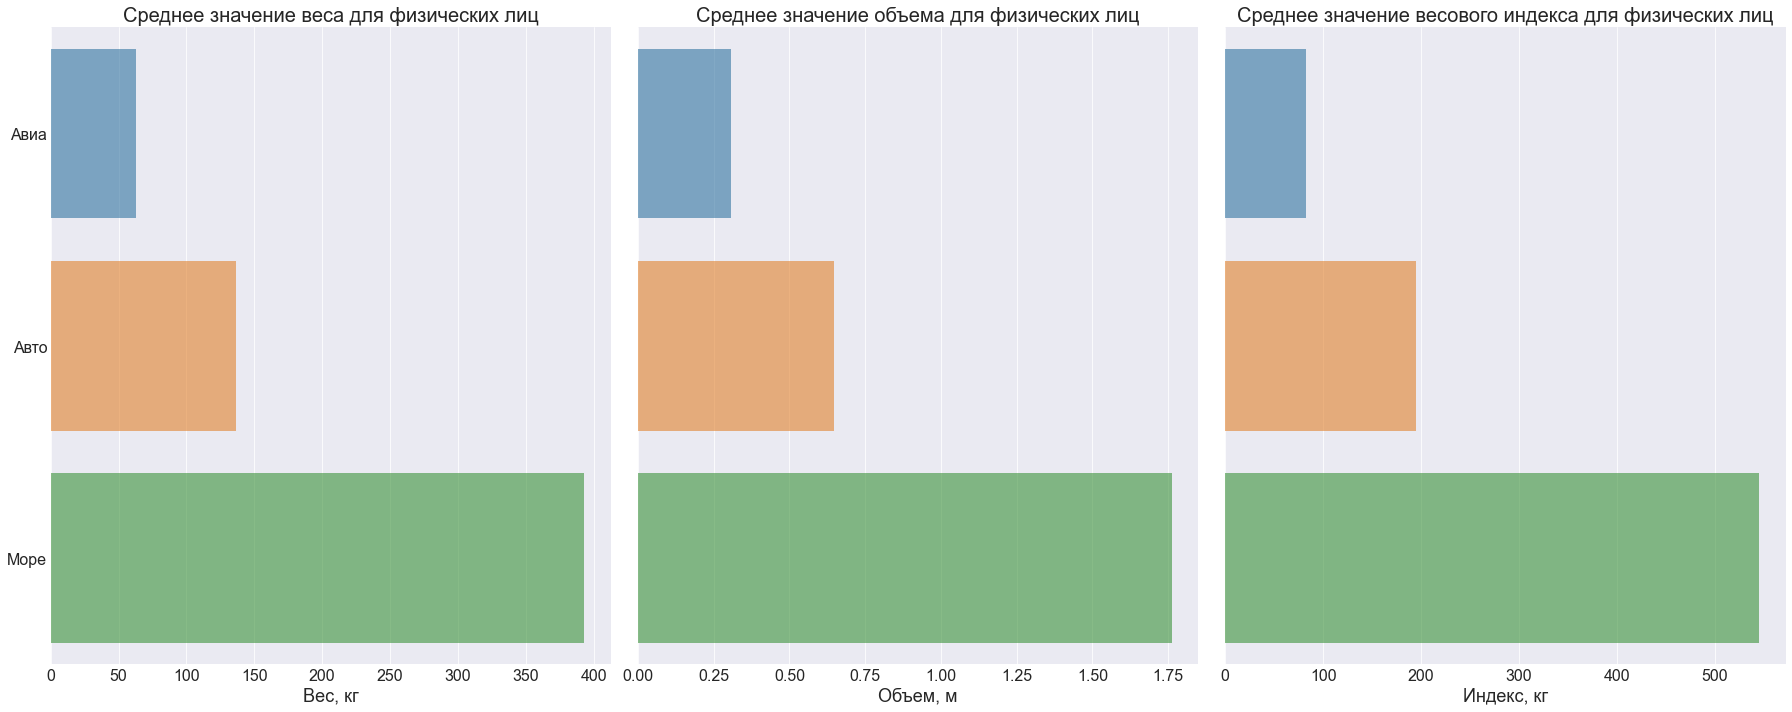

In [54]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y=type_mean_not_entity.index, x=type_mean_not_entity['Вес, кг'], data=type_mean_not_entity, alpha=0.6, ax=ax[0])
ax[0].set_title("Среднее значение веса для физических лиц", fontsize=20)
ax[0].set_xlabel('Вес, кг', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=type_mean_not_entity.index, x=type_mean_not_entity['Объем, м'], data=type_mean_not_entity, alpha=0.6, ax=ax[1])
ax[1].set_title("Среднее значение объема для физических лиц", fontsize=20)
ax[1].set_xlabel('Объем, м', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=type_mean_not_entity.index, x=type_mean_not_entity['Индекс, кг'], data=type_mean_not_entity, alpha=0.6, ax=ax[2])
ax[2].set_title("Среднее значение весового индекса для физических лиц", fontsize=20)
ax[2].set_xlabel('Индекс, кг', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

In [55]:
type_median_not_entity = data_not_entity.groupby('Тип').agg({'Вес, кг': 'median', 'Объем, м': 'median', 'Индекс, кг': 'median'})
type_median_not_entity

,"Вес, кг","Объем, м","Индекс, кг"
Тип,,,
Авиа,29.0,0.12,38.5
Авто,50.0,0.23,70.0
Море,176.0,0.95,233.5


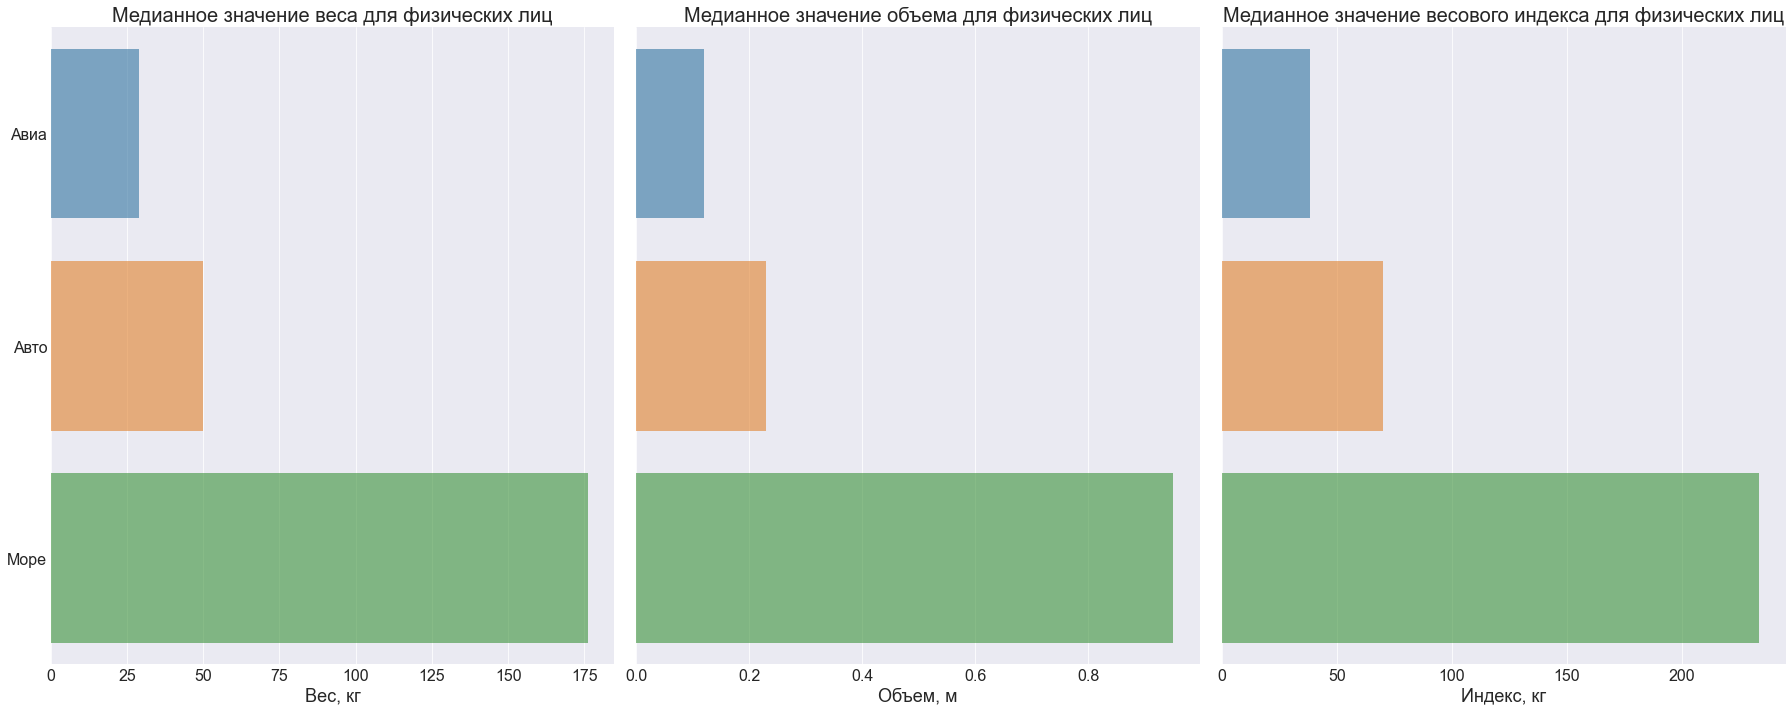

In [56]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y=type_median_not_entity.index, x=type_median_not_entity['Вес, кг'], data=type_median_not_entity, alpha=0.6, ax=ax[0])
ax[0].set_title("Медианное значение веса для физических лиц", fontsize=20)
ax[0].set_xlabel('Вес, кг', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=type_median_not_entity.index, x=type_median_not_entity['Объем, м'], data=type_median_not_entity, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианное значение объема для физических лиц", fontsize=20)
ax[1].set_xlabel('Объем, м', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=type_median_not_entity.index, x=type_median_not_entity['Индекс, кг'], data=type_median_not_entity, alpha=0.6, ax=ax[2])
ax[2].set_title("Медианное значение весового индекса для физических лиц", fontsize=20)
ax[2].set_xlabel('Индекс, кг', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

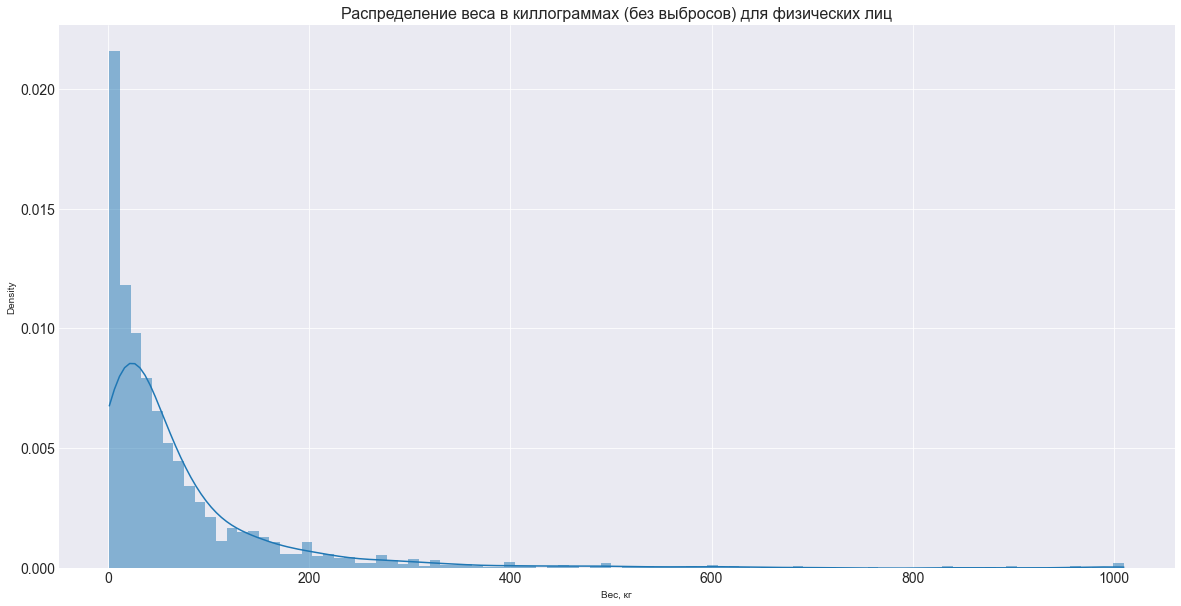

In [57]:
# Наблюдаемое отклонение от среднего
dev = (data_not_entity['Вес, кг']-data_not_entity['Вес, кг'].mean()).abs()
# Стандартное отклонение
std = data_not_entity['Вес, кг'].std()
# Фильтруем исходный набор данных
data_not_entity_trimmed = data_not_entity[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение веса в киллограммах (без выбросов) для физических лиц", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(data_not_entity_trimmed['Вес, кг'], stat="density", kde=True, linewidth=0)
plt.show()

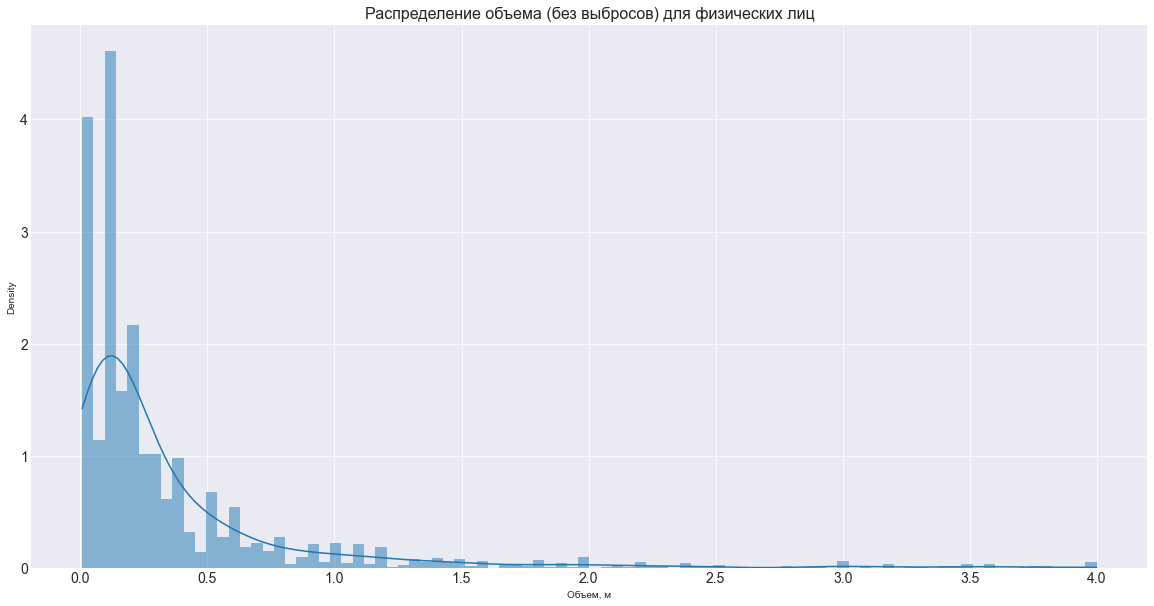

In [58]:
# Наблюдаемое отклонение от среднего
dev = (data_not_entity['Объем, м']-data_not_entity['Объем, м'].mean()).abs()
# Стандартное отклонение
std = data_not_entity['Объем, м'].std()
# Фильтруем исходный набор данных
data_not_entity_trimmed = data_not_entity[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение объема (без выбросов) для физических лиц", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(data_not_entity_trimmed['Объем, м'], stat="density", kde=True, linewidth=0)
plt.show()

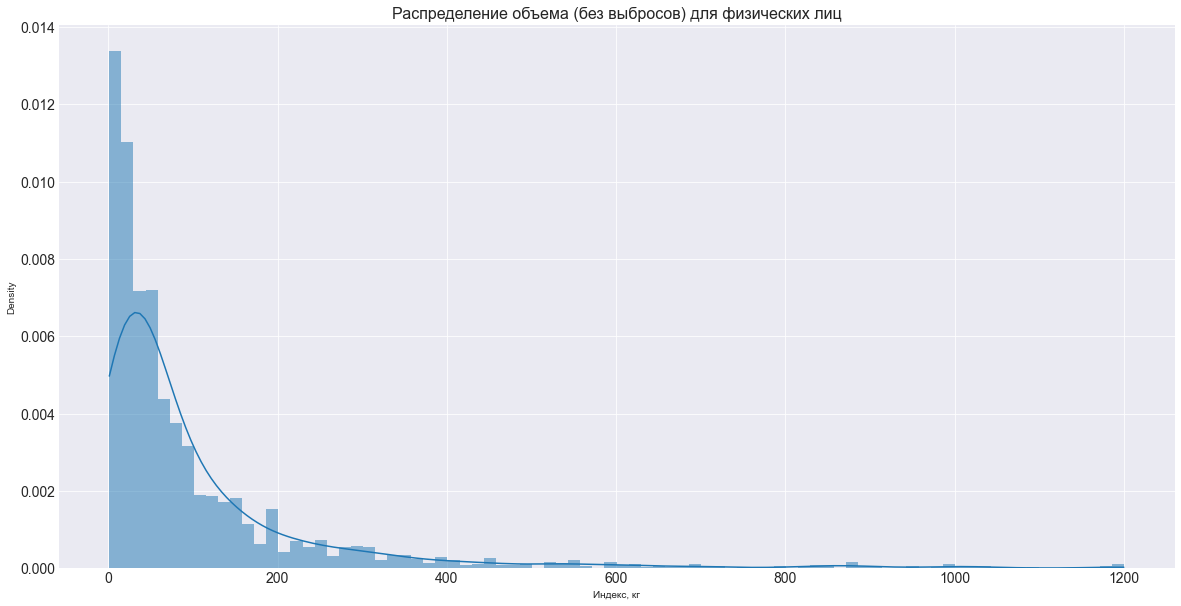

In [59]:
# Наблюдаемое отклонение от среднего
dev = (data_not_entity['Индекс, кг']-data_not_entity['Индекс, кг'].mean()).abs()
# Стандартное отклонение
std = data_not_entity['Индекс, кг'].std()
# Фильтруем исходный набор данных
data_not_entity_trimmed = data_not_entity[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение объема (без выбросов) для физических лиц", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(data_not_entity_trimmed['Индекс, кг'], stat="density", kde=True, linewidth=0)
plt.show()

## 3.1.3 Среднее и медианное значение веса, объема и весового индекса, а так же их гистограммы распределения для всех клиентов

In [60]:
all_clients_df = data.copy()
all_clients_mean = all_clients_df.groupby('Тип').agg({'Вес, кг': 'mean', 'Объем, м': 'mean', 'Индекс, кг': 'mean'})
all_clients_mean

,"Вес, кг","Объем, м","Индекс, кг"
Тип,,,
Авиа,68.923036,0.372620,84.073788
Авто,115.075550,0.577372,154.374868
Море,487.380952,2.426976,1462.190476


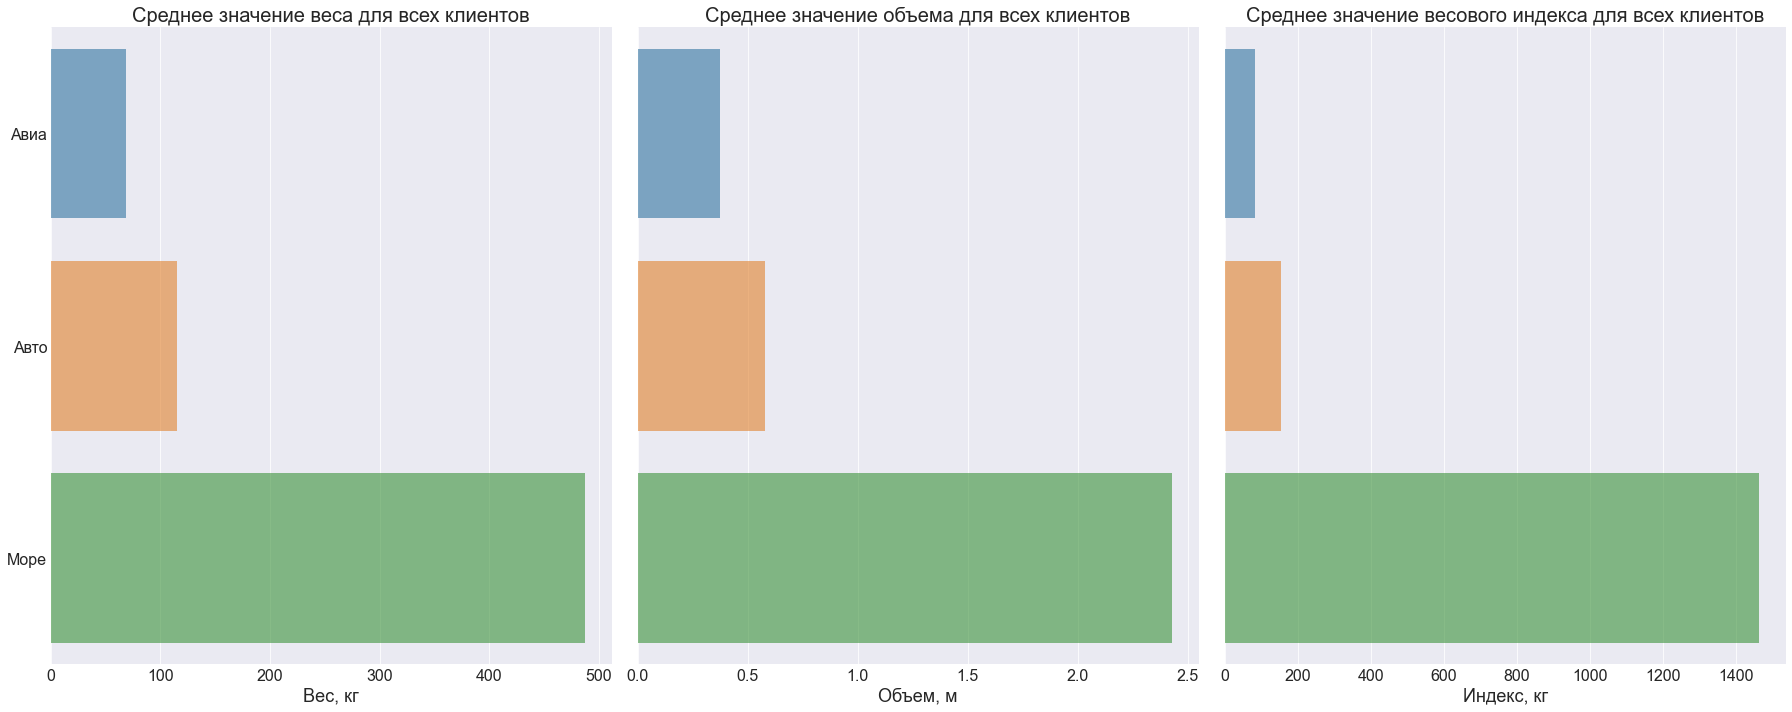

In [61]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y=all_clients_mean.index, x=all_clients_mean['Вес, кг'], data=all_clients_mean, alpha=0.6, ax=ax[0])
ax[0].set_title("Среднее значение веса для всех клиентов", fontsize=20)
ax[0].set_xlabel('Вес, кг', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=all_clients_mean.index, x=all_clients_mean['Объем, м'], data=all_clients_mean, alpha=0.6, ax=ax[1])
ax[1].set_title("Среднее значение объема для всех клиентов", fontsize=20)
ax[1].set_xlabel('Объем, м', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=all_clients_mean.index, x=all_clients_mean['Индекс, кг'], data=all_clients_mean, alpha=0.6, ax=ax[2])
ax[2].set_title("Среднее значение весового индекса для всех клиентов", fontsize=20)
ax[2].set_xlabel('Индекс, кг', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

In [62]:
all_clients_median = all_clients_df.groupby('Тип').agg({'Вес, кг': 'median', 'Объем, м': 'median', 'Индекс, кг': 'median'})
all_clients_median

,"Вес, кг","Объем, м","Индекс, кг"
Тип,,,
Авиа,25.0,0.111,30.0
Авто,32.0,0.180,45.0
Море,176.0,1.000,258.5


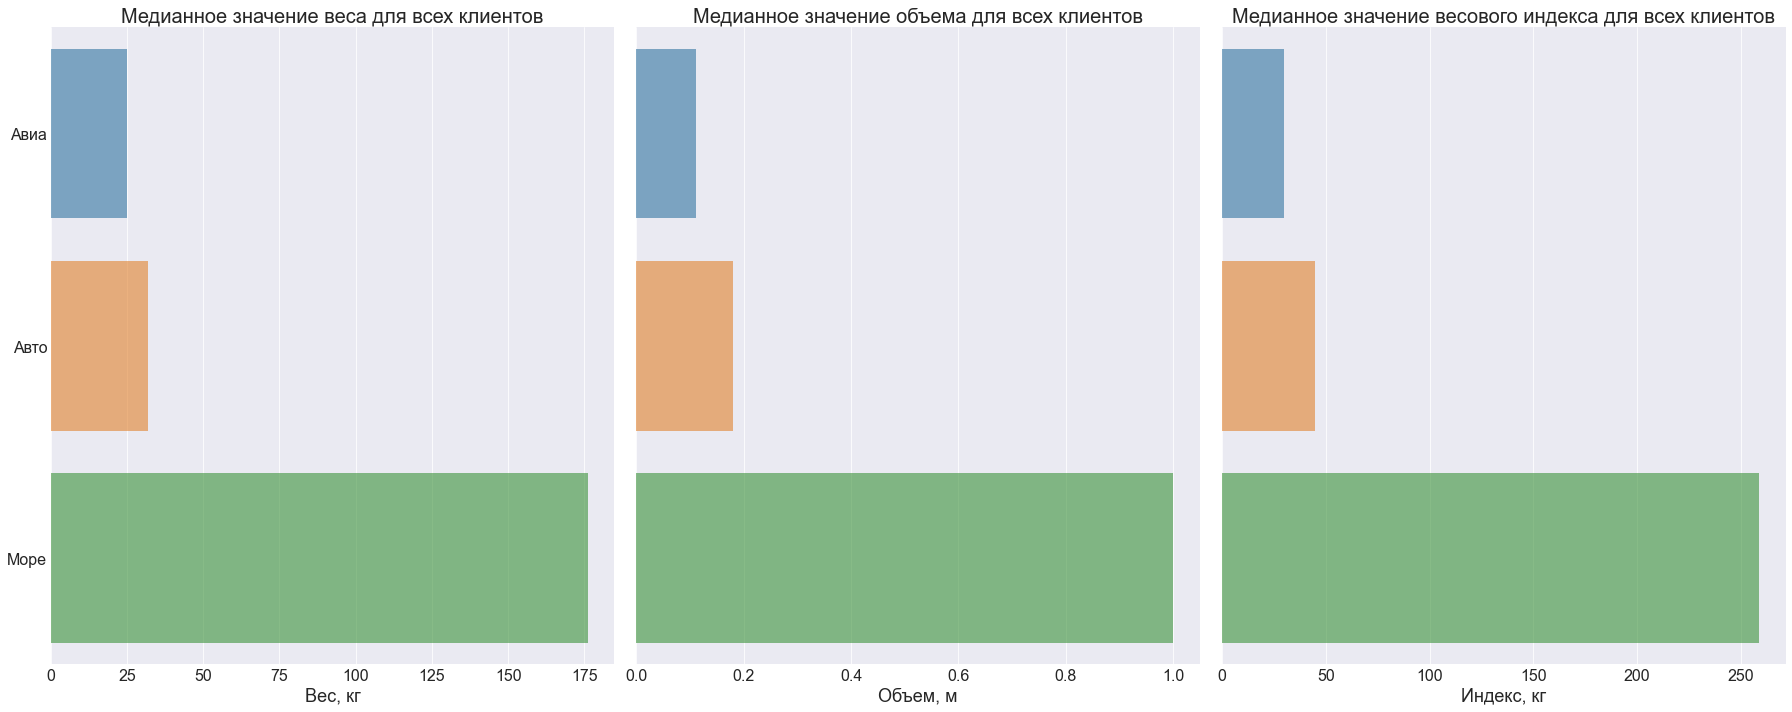

In [63]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y=all_clients_median.index, x=all_clients_median['Вес, кг'], data=all_clients_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медианное значение веса для всех клиентов", fontsize=20)
ax[0].set_xlabel('Вес, кг', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y=all_clients_median.index, x=all_clients_median['Объем, м'], data=all_clients_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медианное значение объема для всех клиентов", fontsize=20)
ax[1].set_xlabel('Объем, м', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y=all_clients_median.index, x=all_clients_median['Индекс, кг'], data=all_clients_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медианное значение весового индекса для всех клиентов", fontsize=20)
ax[2].set_xlabel('Индекс, кг', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

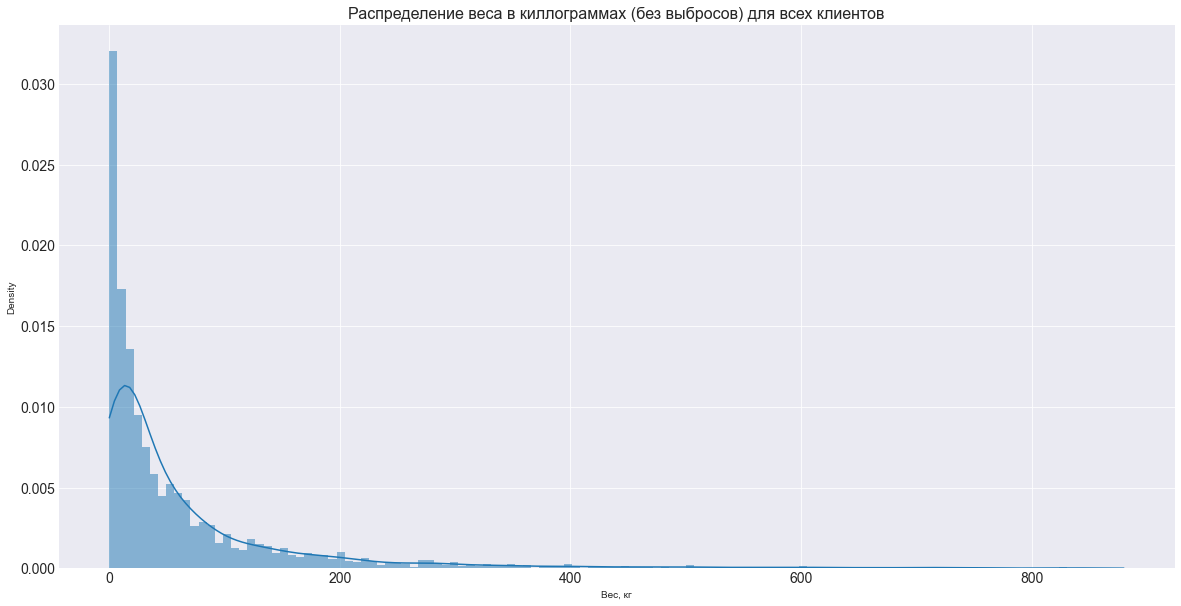

In [64]:
# Наблюдаемое отклонение от среднего
dev = (all_clients_df['Вес, кг']-all_clients_df['Вес, кг'].mean()).abs()
# Стандартное отклонение
std = all_clients_df['Вес, кг'].std()
# Фильтруем исходный набор данных
all_clients_df_trimmed = all_clients_df[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение веса в киллограммах (без выбросов) для всех клиентов", fontsize=16)
plt.tick_params(labelsize=14)
#plt.xticks(np.arange(0, max(all_clients_df_trimmed['Вес, кг']+1), 200))

sns.histplot(all_clients_df_trimmed['Вес, кг'], stat="density", kde=True, linewidth=0)
plt.show()

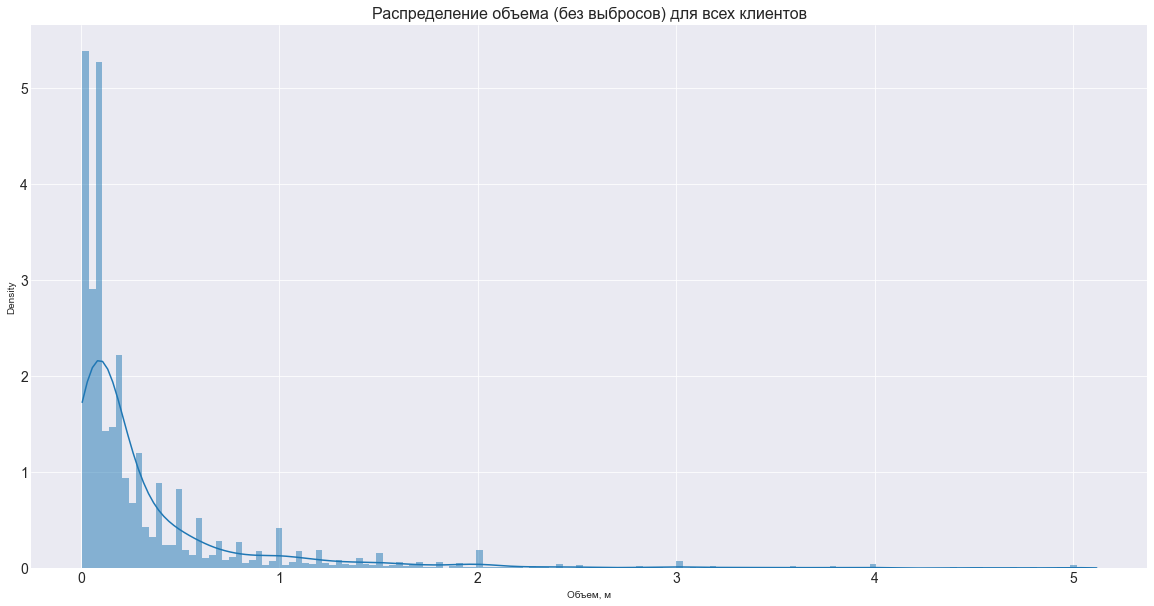

In [65]:
# Наблюдаемое отклонение от среднего
dev = (all_clients_df['Объем, м']-all_clients_df['Объем, м'].mean()).abs()
# Стандартное отклонение
std = all_clients_df['Объем, м'].std()
# Фильтруем исходный набор данных
all_clients_df_trimmed = all_clients_df[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение объема (без выбросов) для всех клиентов", fontsize=16)
plt.tick_params(labelsize=14)

sns.histplot(all_clients_df_trimmed['Объем, м'], stat="density", kde=True, linewidth=0)
plt.show()

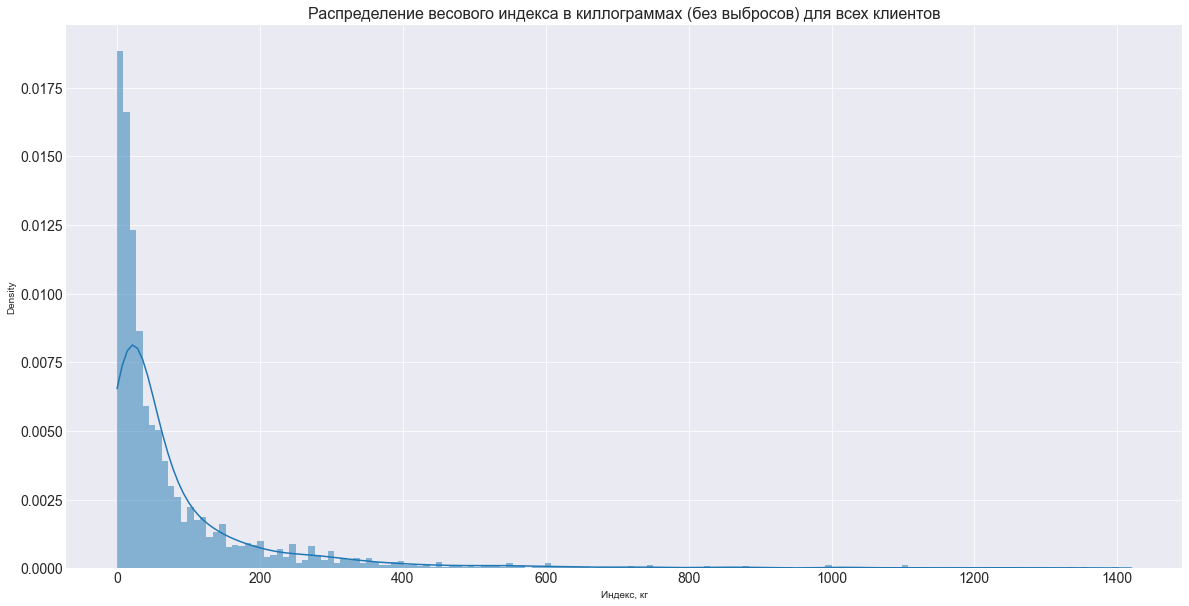

In [66]:
# Наблюдаемое отклонение от среднего
dev = (all_clients_df['Индекс, кг']-all_clients_df['Индекс, кг'].mean()).abs()
# Стандартное отклонение
std = all_clients_df['Индекс, кг'].std()
# Фильтруем исходный набор данных
all_clients_df_trimmed = all_clients_df[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение весового индекса в киллограммах (без выбросов) для всех клиентов", fontsize=16)
plt.tick_params(labelsize=14)
#plt.xticks(np.arange(0, max(all_clients_df_trimmed['Вес, кг']+1), 200))

sns.histplot(all_clients_df_trimmed['Индекс, кг'], stat="density", kde=True, linewidth=0)
plt.show()